### Imports

In [1]:
import numpy as np
import pylab as pl
import scipy as sp

## 1.3 Load Data

**Temper file**

In [2]:
# Loading of temper file
temper = np.load("temper.npz")
data = temper["data"]
villes = temper["villes"]
varname = temper["varname"]
temper.close()

**Digits file**

In [3]:
# Loading of digits file
digits = np.load("digits.npz")
x = digits["x"]/255 #Rescaling the digits
y = digits["y"]
xt = digits["xt"]/255 #Rescaling the digits
yt = digits["yt"]
digits.close()

### Visualisation

**Temperature**

(15,)


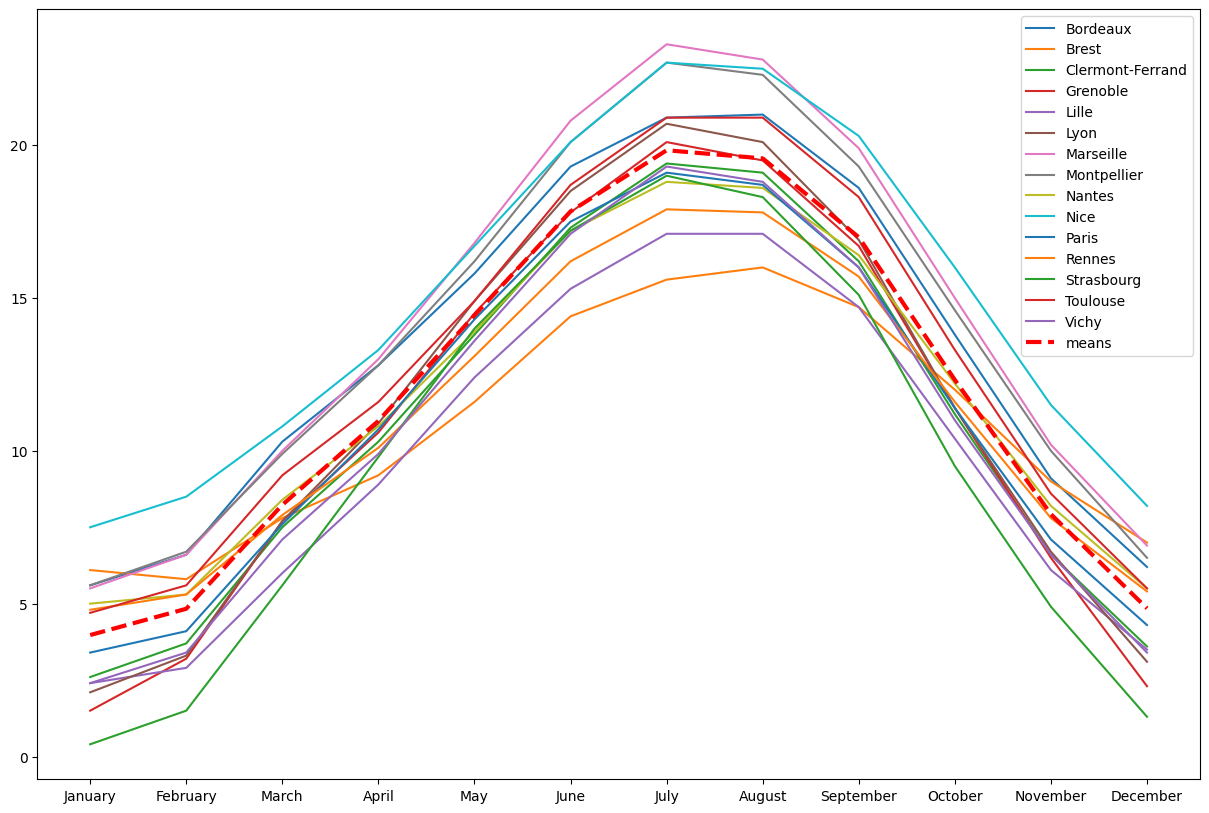

In [4]:
# Lets start with temperature variables
temperatures = data[:,:data.shape[1]-2]
monthes = varname[:varname.shape[0]-2]
means = temperatures.mean(axis=0)
labels = np.concatenate((villes,["means"]))
pl.figure(figsize=(15,10))
pl.plot(monthes,temperatures.T)
pl.plot(monthes,means,label="means",
        color="red", linewidth=3, linestyle="--")
pl.legend(labels)
print(villes.shape)

**Digits**

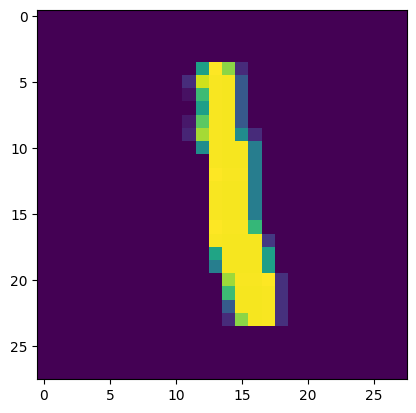

In [5]:
im = x[1].reshape((28,28))
pl.imshow(im)

### Reproducing the figures

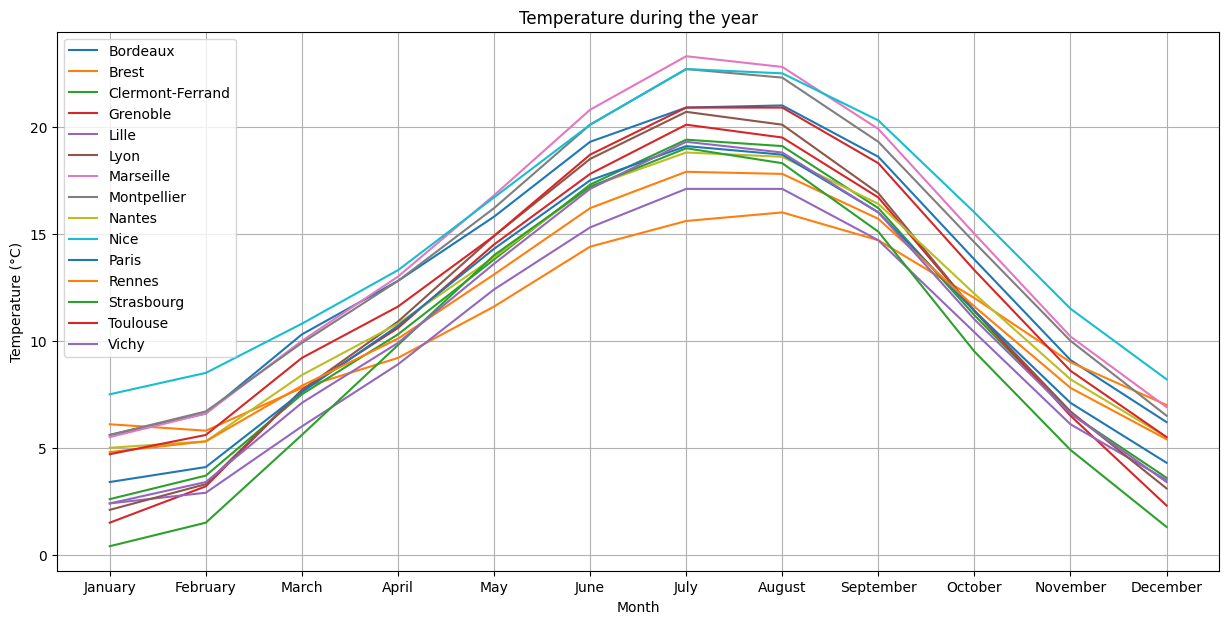

In [6]:
# Lets start with temperature variables
pl.figure(figsize=(15,7))
pl.plot(monthes,temperatures.T)
pl.grid()
pl.ylabel("Temperature (°C)")
pl.xlabel("Month")
pl.title("Temperature during the year")
pl.legend(villes)

[44.5 48.2 45.5 45.1 50.4 45.5 43.2 43.4 47.1 43.4 48.5 48.1 48.4 43.4
 46.1]


Text(0.5, 1.0, 'Position of the cities in France')

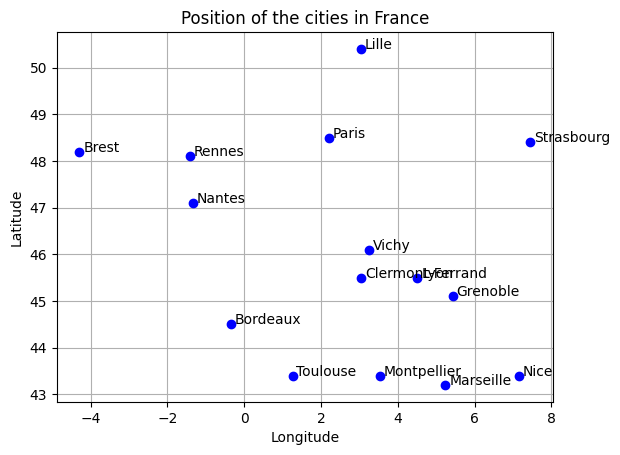

In [7]:
latitude = data[:,-2]
longitude = data[:,-1]
for u,v,w in zip(latitude, longitude,villes):
    pl.plot(v,u,'o',color = "blue")
    pl.text(v+0.1,u,w)
print(latitude)
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position of the cities in France")


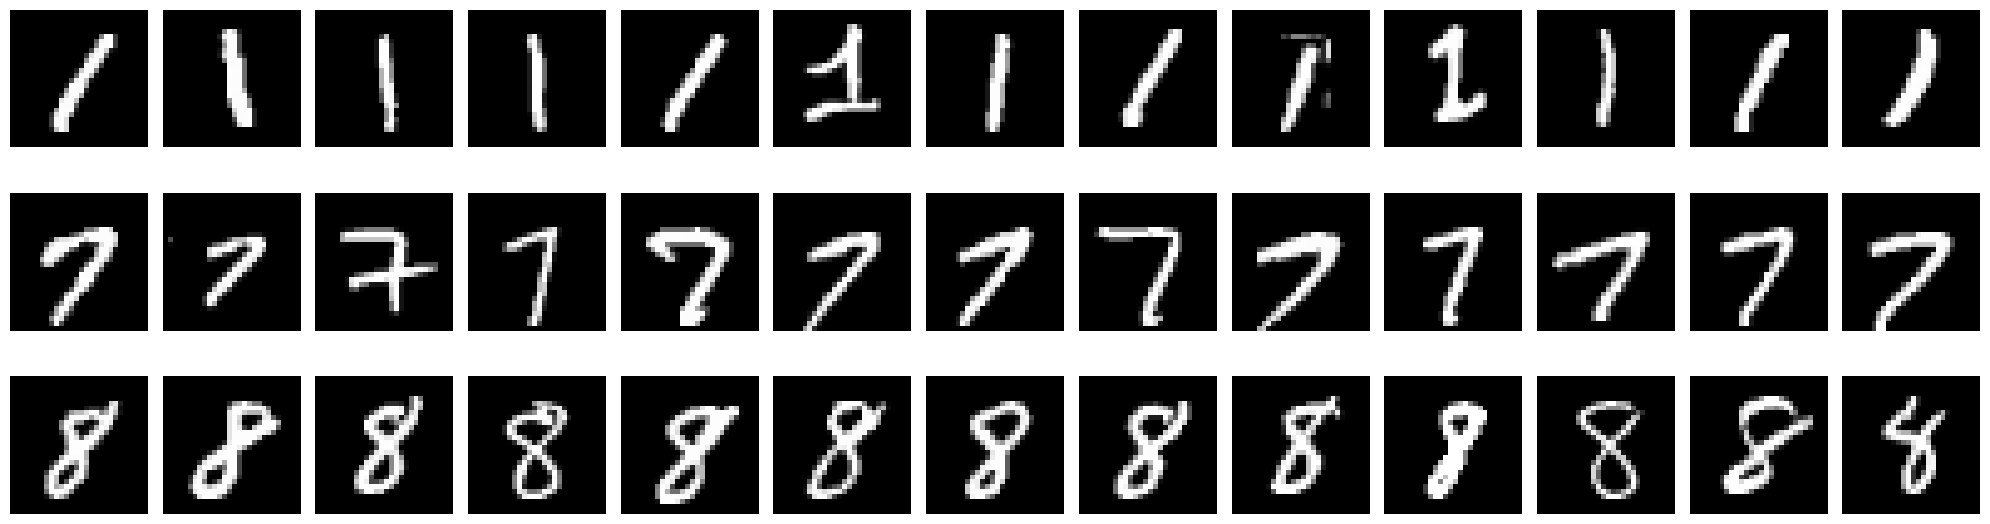

In [8]:
fig, axes = pl.subplots(3, 13, figsize=(20, 6))  # axes is shape (3,13)

for i in range(3):
    for j in range(13):
        idx = i * 1000 + j   # flatten index
        axes[i, j].imshow(x[idx].reshape(28, 28), cmap="gray")
        axes[i, j].axis("off")

pl.tight_layout()
pl.show()


## 2 Clustering

## K = 3

In [9]:
from sklearn.cluster import KMeans

In [10]:
print(villes.shape)

(15,)


In [11]:
kmeans_tpt = KMeans(n_clusters=3).fit(temperatures)
print("Centers:", kmeans_tpt.cluster_centers_)
print("Labels:", kmeans_tpt.labels_)

Centers: [[ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857]
 [ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66      ]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666667 15.93333333
  17.43333333 17.46666667 15.6        11.93333333  8.33333333  5.96666667]]
Labels: [1 2 0 0 0 0 1 1 2 1 0 2 0 1 0]


Text(0.5, 1.0, 'Visualisation of the cities in France knowing there temerature distribution')

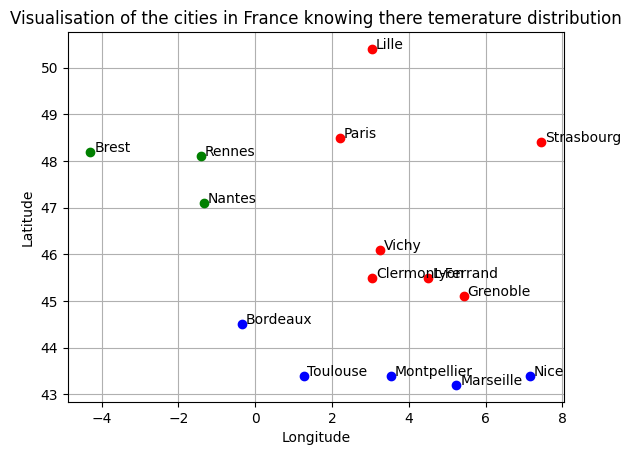

In [12]:
for i in range(15):
    if kmeans_tpt.labels_[i]==0:
        color = "red"
    if kmeans_tpt.labels_[i]==1:
        color = "blue"
    if kmeans_tpt.labels_[i]==2:
        color = "green"
    pl.plot(longitude[i],latitude[i],'o',color = color)
    pl.text(longitude[i]+0.1,latitude[i],villes[i])
pl.grid()
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Visualisation of the cities in France knowing there temerature distribution")
    

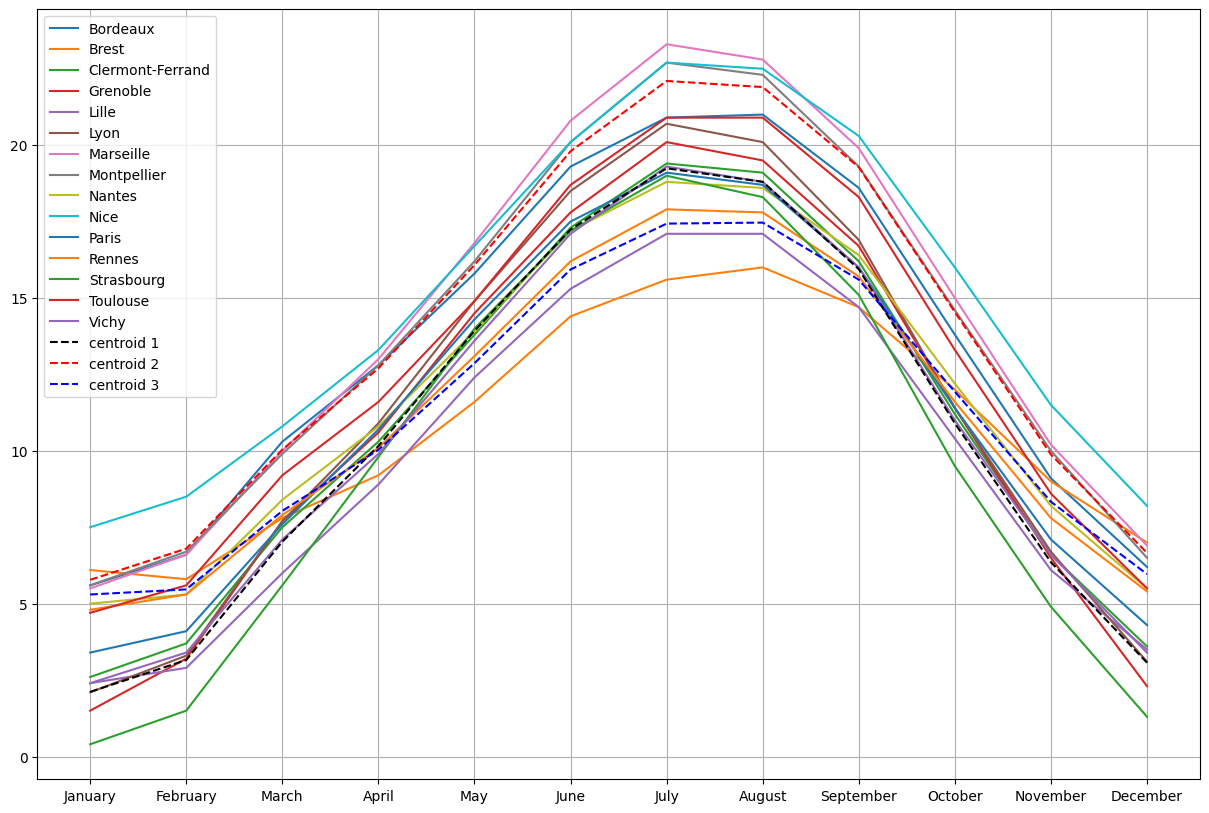

In [13]:
pl.figure(figsize=(15,10))
pl.plot(monthes ,temperatures.T)
pl.plot(monthes, kmeans_tpt.cluster_centers_[0],linestyle = 'dashed',color = "black")
pl.plot(monthes, kmeans_tpt.cluster_centers_[1],linestyle = 'dashed',color = "red")
pl.plot(monthes, kmeans_tpt.cluster_centers_[2],linestyle = 'dashed',color = "blue")
pl.grid()
labels = np.concatenate((villes,["centroid 1", "centroid 2", "centroid 3"]))
pl.legend(labels)
#pl.legend()


**Interpretation (temperature case):**
</br>
We can notice that when we applied the kmeans on the different city temperatures, we got a graphical division of the frensh cities.
- the first group is composed of (Brest, Nantes, Rennes) bretagnes cities, known by their perturbed climate
- the second groupe is composed of (Lille, Paris, Strasbourg, Vichy, Clerement feront, grenoble, Lyon) which are all eastern cities, some of them in the north and others slightly into the south.  
- The last groupe contains (Bordeau, Toulouse, Montpellier, Marseille, Nice) which are all cities in the extreme south of the country of France.

(I have to check in google if those cities really share the same climate caracteristics)

In [14]:
kmeans_dt = KMeans(n_clusters=3).fit(x)
print("Centers:", kmeans_dt.cluster_centers_)
print("Labels:", kmeans_dt.labels_)
print(kmeans_dt.labels_.shape)

Centers: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels: [1 1 1 ... 2 2 2]
(3000,)


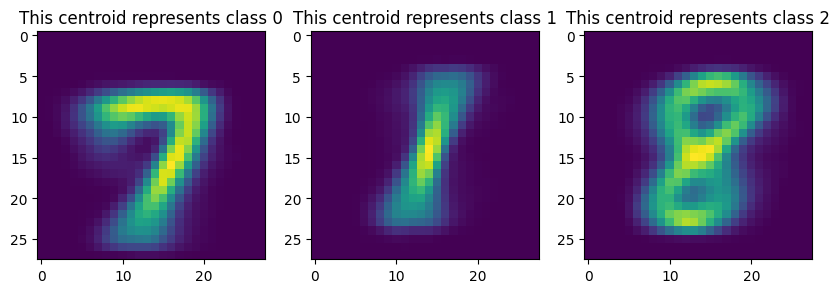

In [15]:
fig, axes = pl.subplots(1,3,figsize = (10,10))
for i in range(3):
    axes[i].imshow(kmeans_dt.cluster_centers_[i].reshape(28,28))
    axes[i].set_title("This centroid represents class "+str(i))
    

**Interpretation (temperature case):**
</br>
- In the case of digits we can notice that the centroids are not true images since they contain values different than 0 and 1 which makes sense since they represent the barycenter of each class.
- In the same time we can notice that in our case the centroids are close enough to the shape the number they represent which makes the identification easier. 
</br>
- Lets calculate the accuracy of detection of the classes of these numbers based on the suppositions we made.

In [16]:
y_results = y.reshape((3000,))
nbr_1 = y_results==1
nbr_7 = y_results==7
nbr_8 = y_results==8
pred_1 = kmeans_dt.labels_== 1
pred_7 = kmeans_dt.labels_ == 2
pred_8 = kmeans_dt.labels_==0
print("Number 1 is detected with an accuricy of : ", sum(nbr_1==pred_1)/len(y_results))
print("Number 7 is detected with an accuricy of : ", sum(nbr_7==pred_7)/len(y_results))
print("Number 8 is detected with an accuricy of : ", sum(nbr_8==pred_8)/len(y_results))

Number 1 is detected with an accuricy of :  0.9143333333333333
Number 7 is detected with an accuricy of :  0.392
Number 8 is detected with an accuricy of :  0.369


**Conclustion :**
- We can conclude that our assumption can be validated since the accuracy of detection of all classes is more tha 0.9.
- The errors in the prediction can be due to the fact that some numbers like 8 and 1 or 7 and 1 can look the same especialy if 8 is written in a tight way, and for 7 if the top line isn't long enough.

## Different values of K

### In the temperature case lets try with K = 5, 7, 10

In [17]:
kmns5 = KMeans(n_clusters=5).fit(temperatures)
kmns7 = KMeans(n_clusters=7).fit(temperatures)
kmns10 = KMeans(n_clusters=10).fit(temperatures)

### Lets define a plotting funtion for subplots

In [18]:
def plot_sub(sub,model,k):
    colors = pl.cm.tab10(np.linspace(0,1,k))
    for i in range(15):
        sub[0].plot(longitude[i],latitude[i],'o',color=colors[model.labels_[i]])
        sub[0].text(longitude[i]+0.1,latitude[i],villes[i])
    sub[0].grid()
    sub[0].set_xlabel("Longitude")
    sub[0].set_ylabel("Latitude")
    sub[0].set_title("Visualisation of the cities in France knowing there temerature distribution using K = "+ str(k))
    sub[1].plot(monthes ,temperatures.T)
    centroids = []
    for i in range(k):
        sub[1].plot(monthes,model.cluster_centers_[i],linestyle = 'dashed',color=colors[model.labels_[i]])
        centroids.append("centroid "+ str(i))
    sub[1].grid()
    labels = np.concatenate((villes,centroids))
    sub[1].legend(labels,loc="center left")

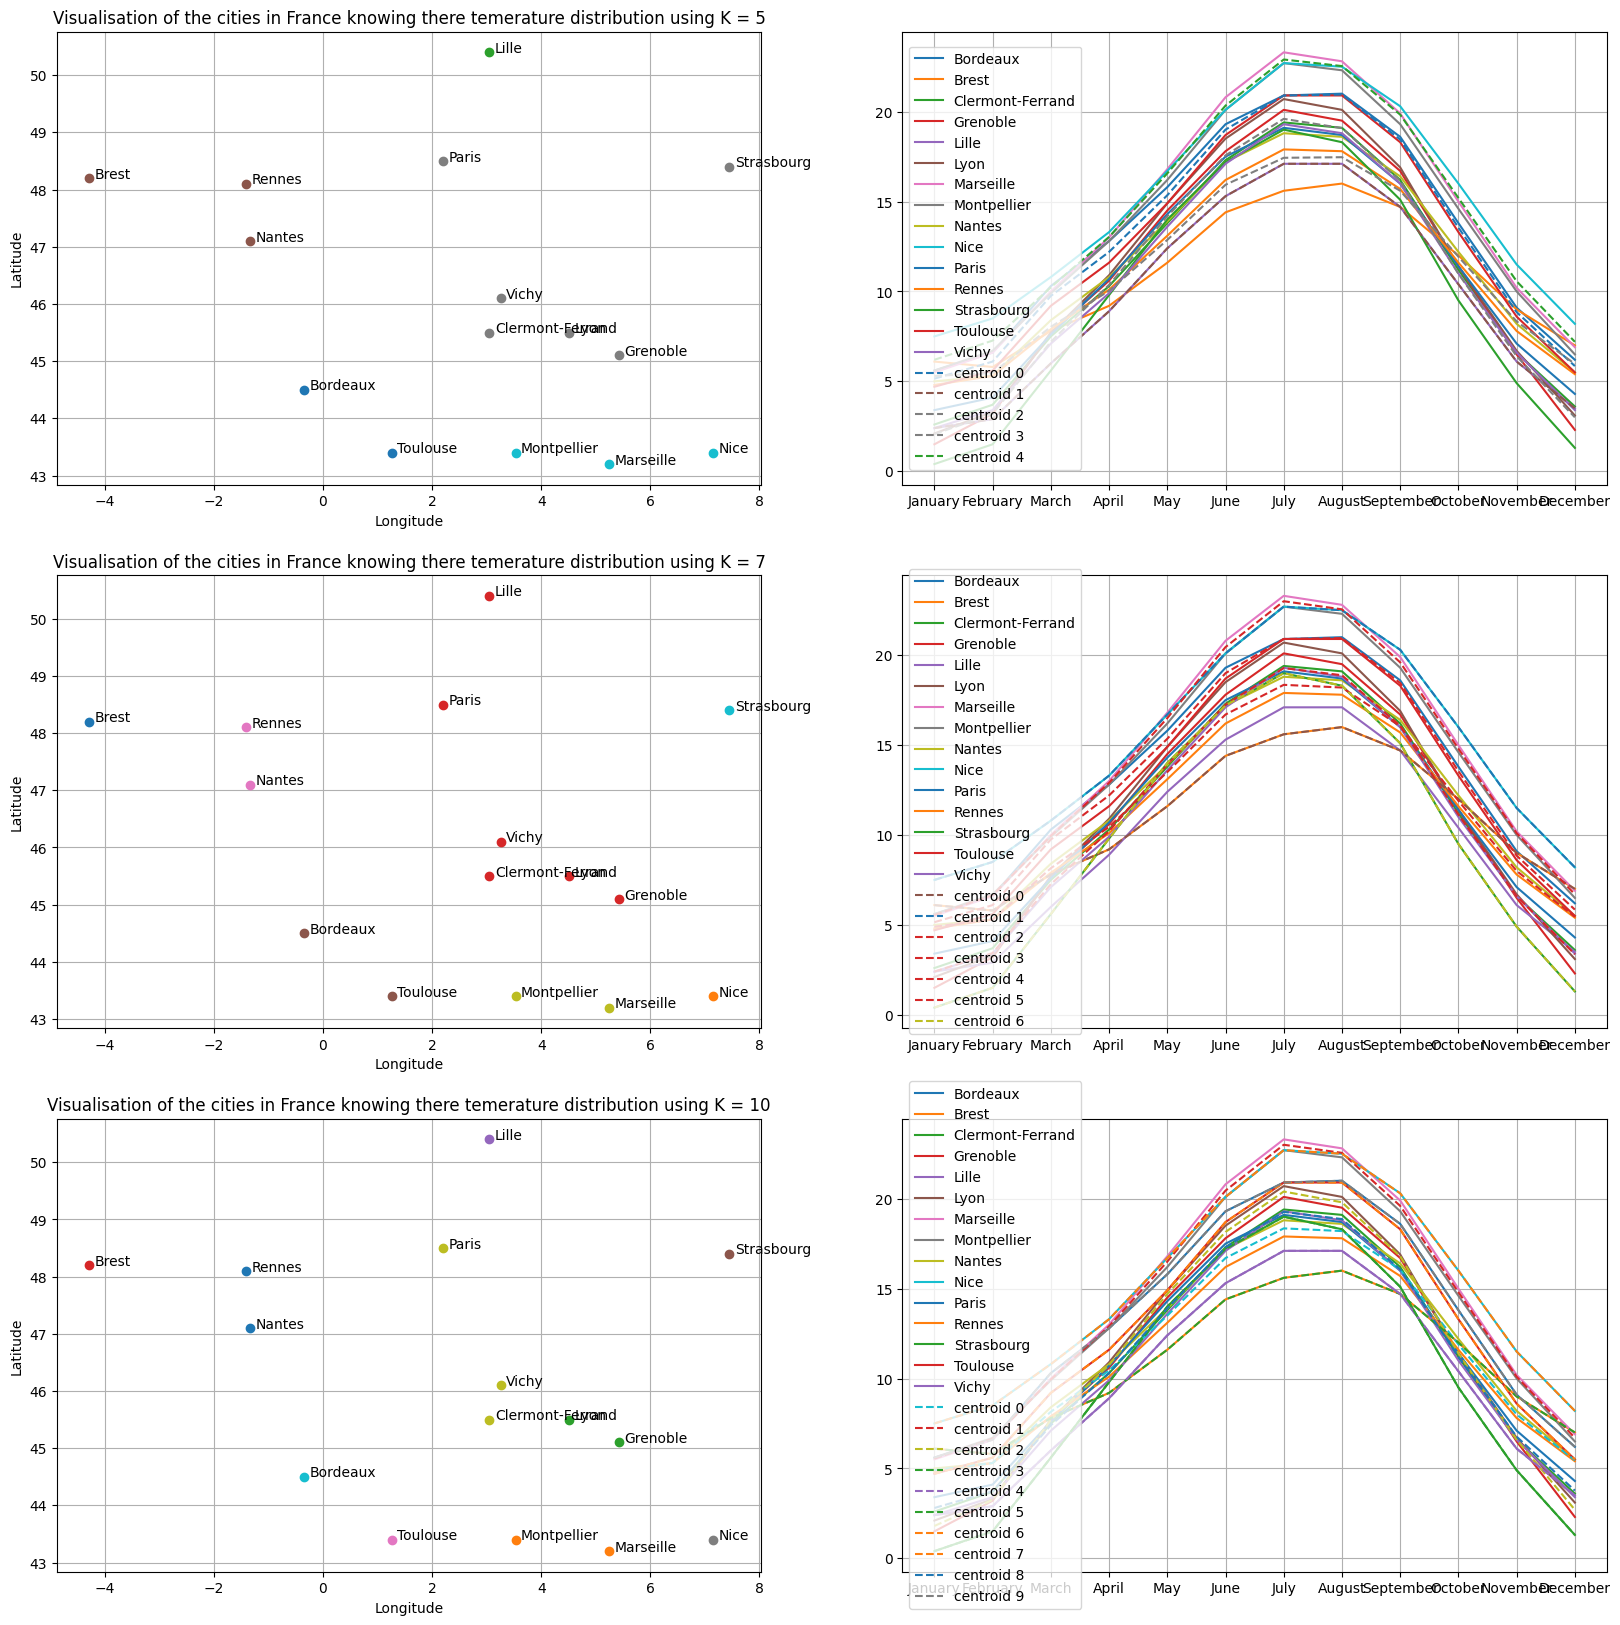

In [19]:
fig, axes = pl.subplots(3,2,figsize=(20,20))
plot_sub(axes[0],kmns5,5)
plot_sub(axes[1],kmns7,7)
plot_sub(axes[2],kmns10,10)
pl.show()

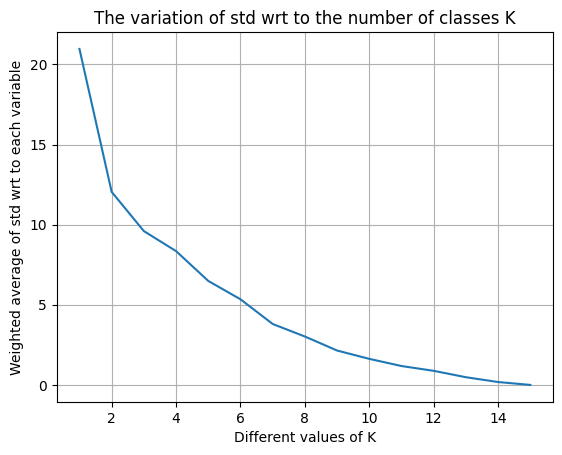

In [20]:
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
varirances = []
for k in K:
    Kmeans_tpt_k = KMeans(n_clusters=k).fit(temperatures)
    y_Kmeans_tpt_k = Kmeans_tpt_k.labels_
    v= 0
    for i in range(k):
        cluster_points = temperatures[y_Kmeans_tpt_k == i]
        weight = len(cluster_points) / len(temperatures)
        v += weight * np.sum(np.std(cluster_points, axis=0))
    varirances.append(v)
pl.plot(K,varirances)
pl.grid()
pl.ylabel("Weighted average of std wrt to each variable")
pl.xlabel("Different values of K")
pl.title("The variation of std wrt to the number of classes K")
pl.show()

**Conclusion :**
- We can notice that at K = 5, 7 we started capturing the different reagions of france divided by there climate caracteristics but when we make K bigger we start getting many classes that contain only one city which makes us lose the generalisation and the comun caracteristics bewteen the different cities.

### The case of digits :

In [21]:
kmns_dgt4 = KMeans(n_clusters=4).fit(x)
kmns_dgt6 = KMeans(n_clusters=6).fit(x)
kmns_dgt10 = KMeans(n_clusters=10).fit(x)

# K = 4

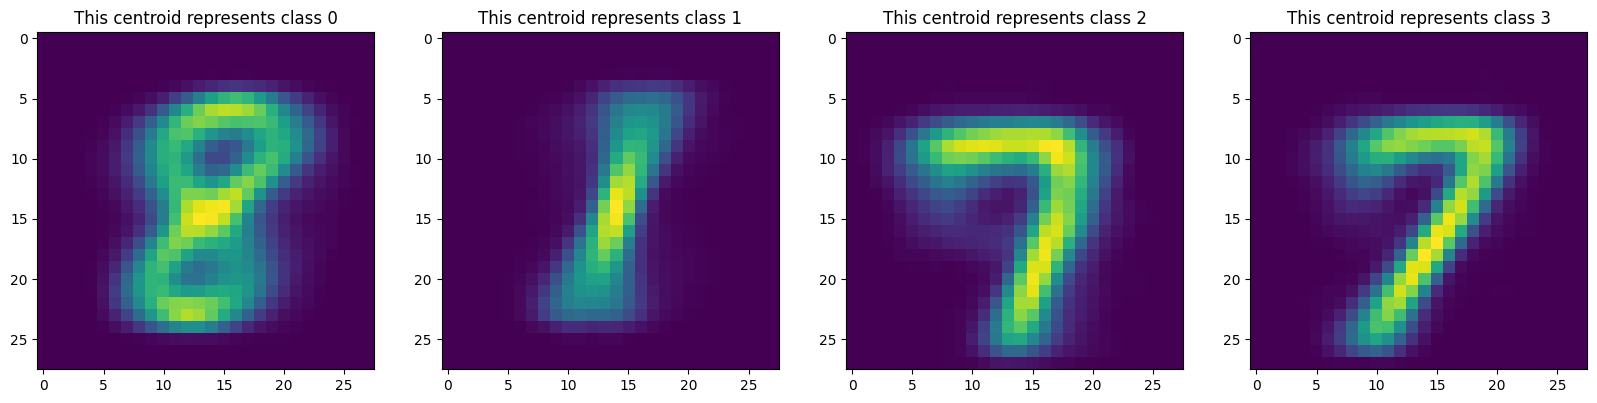

In [22]:
fig, axes = pl.subplots(1,4,figsize = (20,10))
for i in range(4):
    axes[i].imshow(kmns_dgt4.cluster_centers_[i].reshape(28,28))
    axes[i].set_title("This centroid represents class "+str(i))

# K = 6

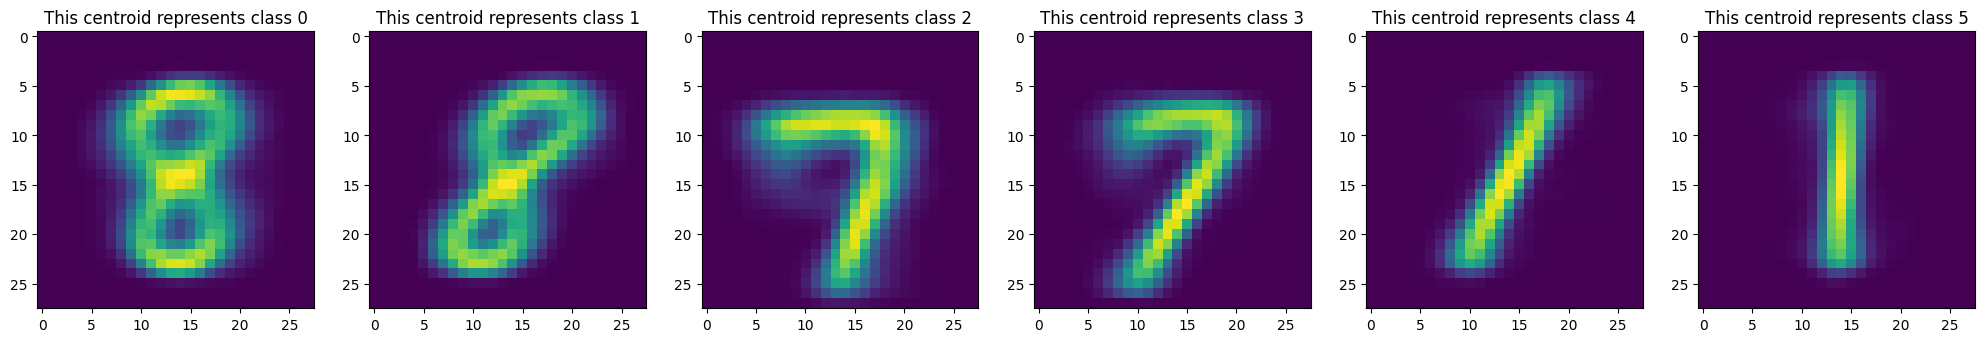

In [23]:
fig, axes = pl.subplots(1,6,figsize = (25,10))
for i in range(6):
    axes[i].imshow(kmns_dgt6.cluster_centers_[i].reshape(28,28))
    axes[i].set_title("This centroid represents class "+str(i))

# K = 10

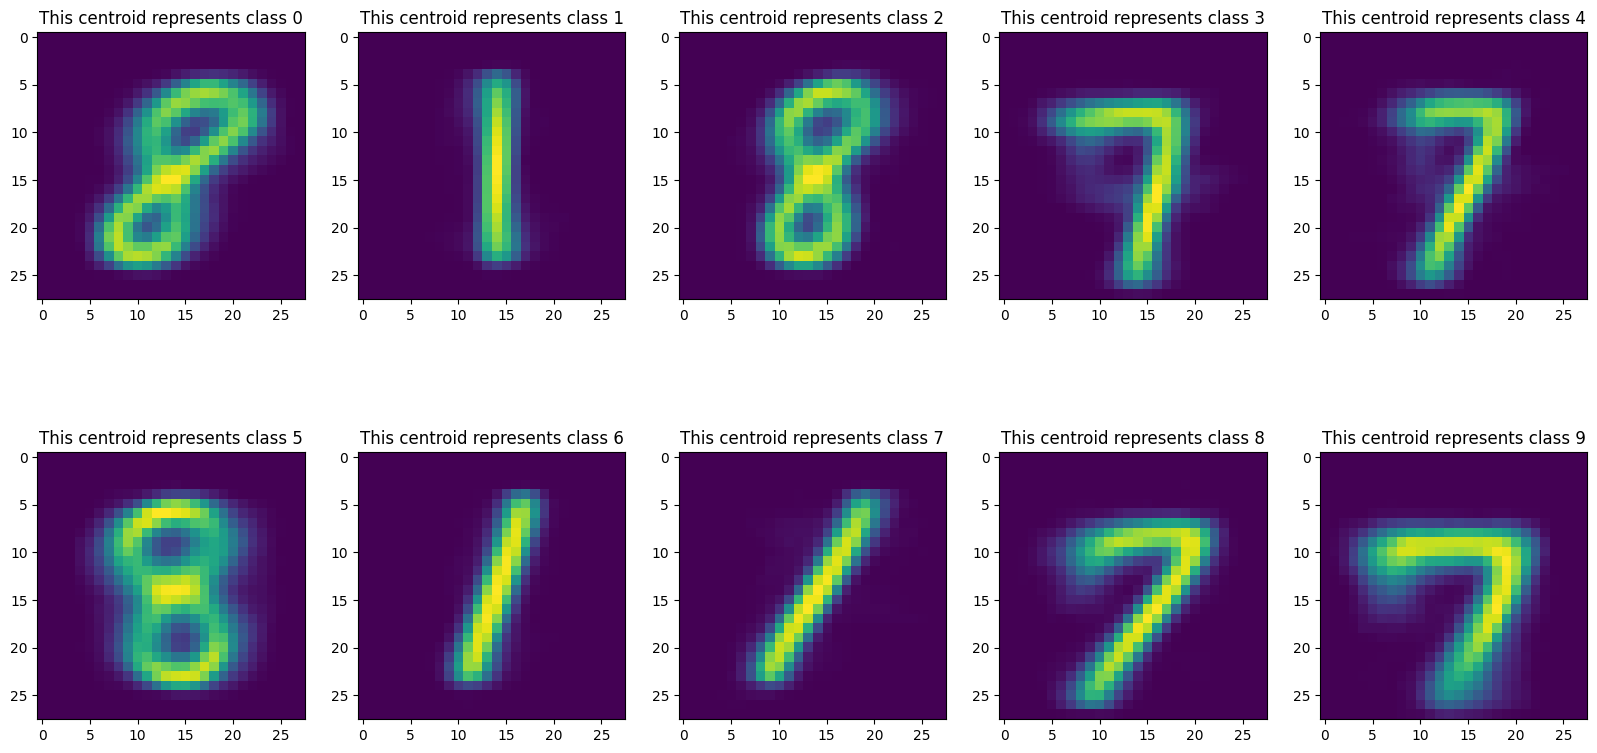

In [24]:
fig, axes = pl.subplots(2,5,figsize = (20,10))
for i in range(5):
    for j in range(2):
        axes[j][i].imshow(kmns_dgt10.cluster_centers_[i+j*5].reshape(28,28))
        axes[j][i].set_title("This centroid represents class "+str(i+j*5))

**Conclusion :**
- In the case of digits when we increase the number of classes we startd detecting different ways of writing each number and we make the difference based on that, for example if the same number is just rotated this rotation can be caprtured in a different centroid since it became a different feature.

## Conclution on the choise of K:

</br>

- The value of K varies depending on what we want to do, for example in the case of digits, if our goal is detect the difference between digits based on there values, it is better to use K as the value of the different classes avalable.
- In general if we want to capture more features or details, it is better to choose a bigger value of K, while if we want to generalise it is better to take a smaller value of K.

## Question 2-3:

**Lets plot the predicted labels as a signal as well as the true signal :**

the number of errors in the class 0 is : 11
the number of errors in the class 1 is : 99
the number of errors in the class 2 is : 171


Text(0.5, 1.0, 'Plot of the predicted labels as a signal')

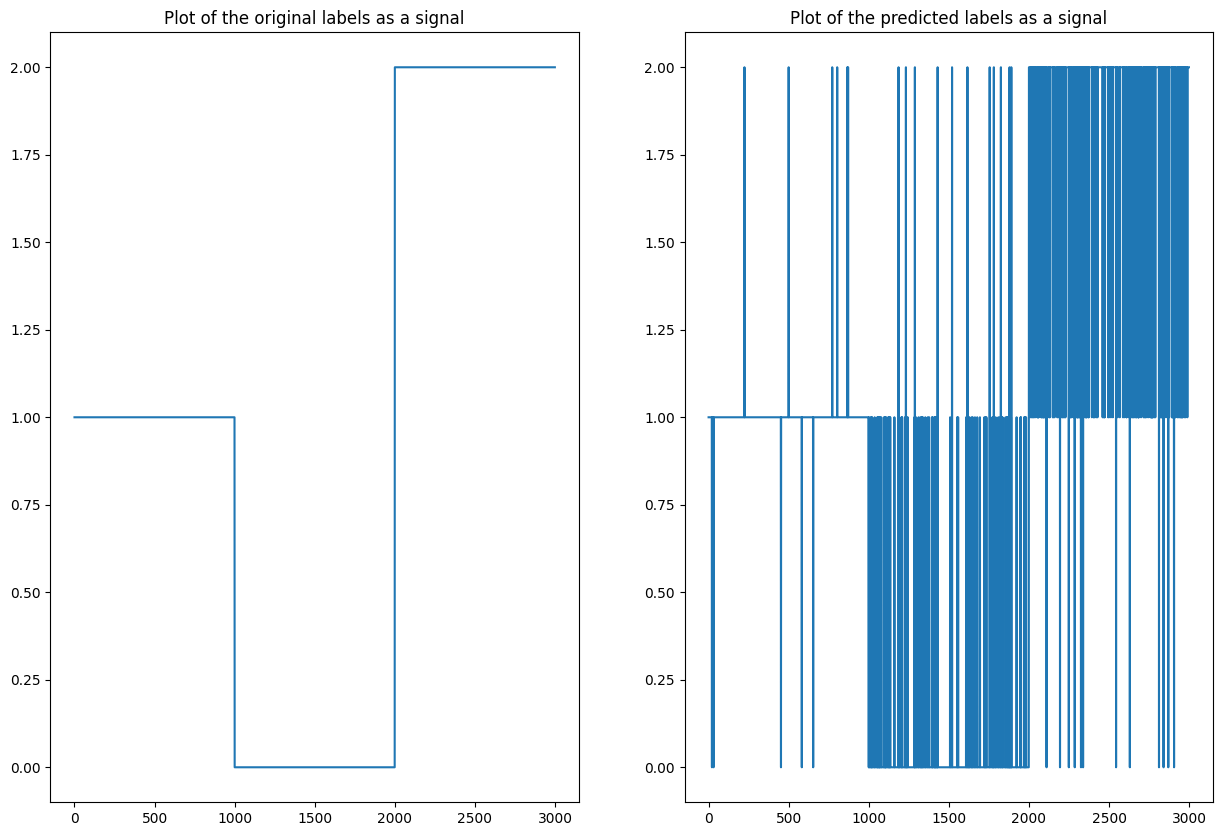

In [25]:
y_0 = y.reshape(1,3000)==7
y_1 = y.reshape(1,3000)==1
y_2 = y.reshape(1,3000)==8
y_pred = 0*y_0[0]+1*y_1[0]+2*y_2[0]
print("the number of errors in the class 0 is :", np.sum(y_pred[:1001]!=kmeans_dt.labels_[:1001]))
print("the number of errors in the class 1 is :", np.sum(y_pred[1001:2001]!=kmeans_dt.labels_[1001:2001]))
print("the number of errors in the class 2 is :", np.sum(y_pred[2001:3001]!=kmeans_dt.labels_[2001:3001]))
fig, axes = pl.subplots(1,2,figsize=(15,10))
axes[0].plot(y_pred)
axes[0].set_title("Plot of the original labels as a signal")
axes[1].plot(kmeans_dt.labels_)
axes[1].set_title("Plot of the predicted labels as a signal")

We can see that in the predicted signal it is not piecewise constant due to the number of errors that were made in the prediction.

**Lets calculate the scores of the prediction :**

In order to do that i have to associate each classe to a number so based on the centroids shown befor and based on the case im wroking on right now:
class0 --> 7, class1 --> 1, class2 --> 8.

In [26]:
from sklearn.metrics import rand_score, adjusted_rand_score

y_0 = y.reshape(1,3000)==7
y_1 = y.reshape(1,3000)==1
y_2 = y.reshape(1,3000)==8
y_pred = 0*y_0[0]+1*y_1[0]+2*y_2[0]
print("Rand score:", rand_score(y_pred, kmeans_dt.labels_))
print("Adjusted Rand score:", adjusted_rand_score(y_pred, kmeans_dt.labels_))

Rand score: 0.881620762476381
Adjusted Rand score: 0.7354465736492245


## Density Estimation : 

In [27]:
from sklearn.mixture import GaussianMixture

GMM_tpt = GaussianMixture(n_components=2,covariance_type='diag').fit(temperatures)
y_GMM_tpt = GMM_tpt.predict(temperatures)
GMM_dgt = GaussianMixture(n_components=3,covariance_type='diag').fit(x)
y_GMM_dgt = GMM_dgt.predict(x)

**Lets visualise the centers of the GMMs :**

### Temperature case :

In [28]:
def plot_sub_GMM(sub,model,k,y_pred):
    colors = pl.cm.tab10(np.linspace(0,1,k))
    for i in range(15):
        sub[0].plot(longitude[i],latitude[i],'o',color=colors[y_pred[i]])
        sub[0].text(longitude[i]+0.1,latitude[i],villes[i])
    sub[0].grid()
    sub[0].set_xlabel("Longitude")
    sub[0].set_ylabel("Latitude")
    sub[0].set_title("Visualisation of the cities in France knowing there temerature distribution using K = "+ str(k))
    sub[1].plot(monthes ,temperatures.T)
    centroids = []
    for i in range(k):
        sub[1].plot(monthes,model.means_[i],linestyle = 'dashed',color=colors[y_pred[i]])
        centroids.append("center "+ str(i))
    sub[1].grid()
    labels = np.concatenate((villes,centroids))
    sub[1].legend(labels,loc="center left")

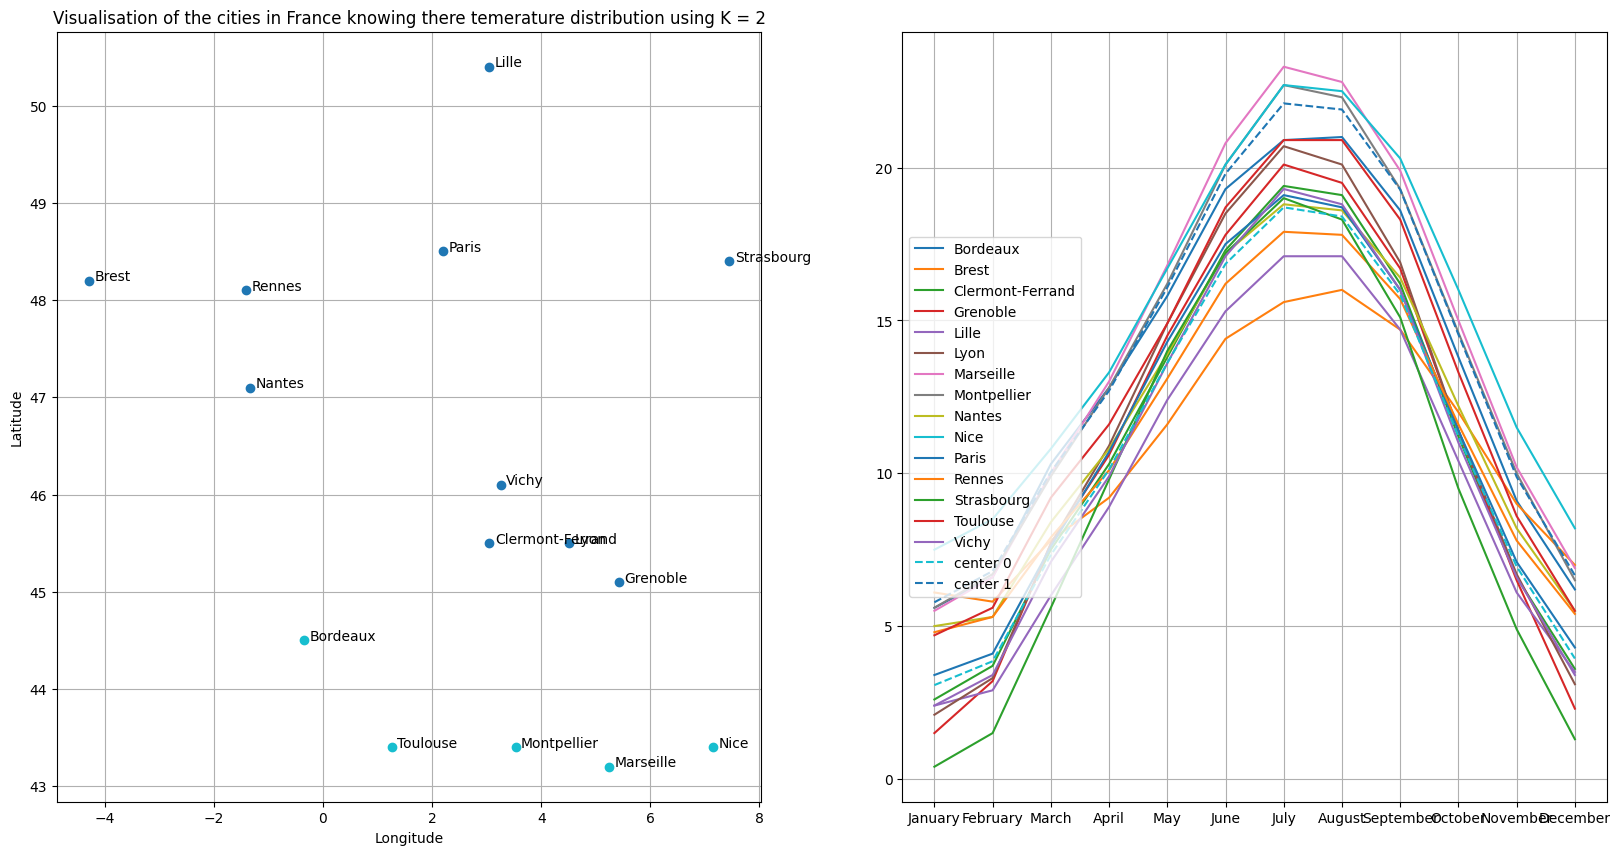

In [29]:
fig, axes = pl.subplots(1,2,figsize=(20,10))
plot_sub_GMM(axes,GMM_tpt,2,y_GMM_tpt)
pl.show()

- We can notice the using K=2, GMM managed to seperate the cities into two main groups:
    - The first one contains the cities of the south such as Toulouse, Montpellier, Marseille ...
    - While the second group contains the cities of the middle and the north of the country.
- We can notice that there is a the separation looks logique but generalises a lot due to the fact that we used only 2 clusters.

### Digits case:

Text(0.5, 1.0, 'Center of class 2')

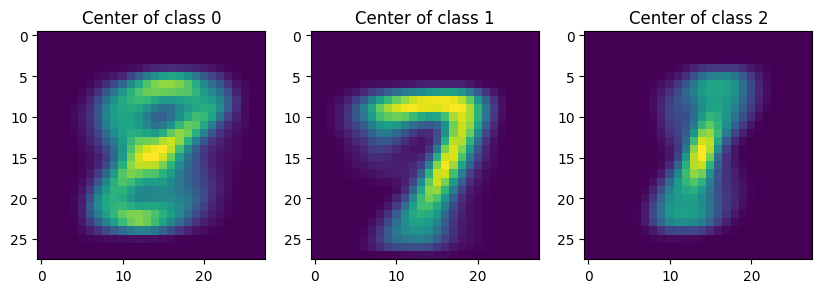

In [30]:
fig, axes = pl.subplots(1,3,figsize=(10,10))
axes[0].imshow(GMM_dgt.means_[0].reshape(28,28))
axes[0].set_title("Center of class 0")
axes[1].imshow(GMM_dgt.means_[1].reshape(28,28))
axes[1].set_title("Center of class 1")
axes[2].imshow(GMM_dgt.means_[2].reshape(28,28))
axes[2].set_title("Center of class 2")

- We can notice that the centers of each cluster are very blured not like Kmeans where we were able to see the main number represented in each cluster.

Lets try to see how homogenous each cluster is when we used GMM.

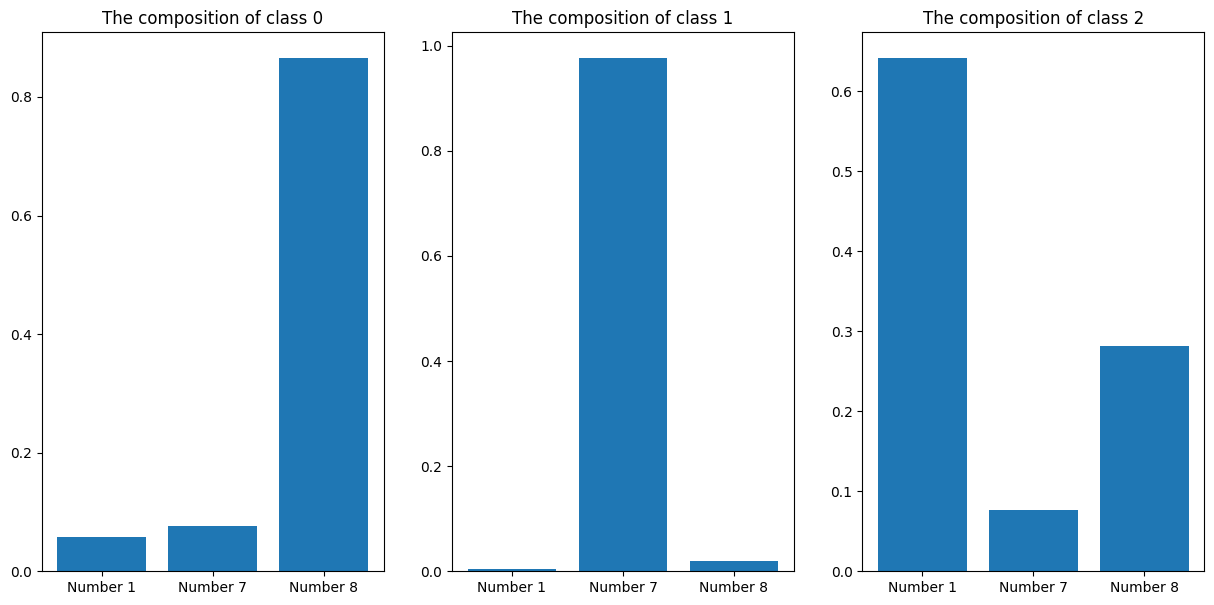

In [31]:
fig, axes = pl.subplots(1,3,figsize = (15,7))
for i in range(3):
    vals = [np.sum(y[y_GMM_dgt==i]==1)/y[y_GMM_dgt==i].shape[0],np.sum(y[y_GMM_dgt==i]==7)/y[y_GMM_dgt==i].shape[0],np.sum(y[y_GMM_dgt==i]==8)/y[y_GMM_dgt==i].shape[0]]
    absices = ["Number 1", "Number 7", "Number 8"]
    axes[i].bar(absices,vals)
    axes[i].set_title("The composition of class "+str(i))

- As we said the plots show that the clusters are not homogenous which makes the centers very unclear.

### Lets try different values of K

#### case of temerature

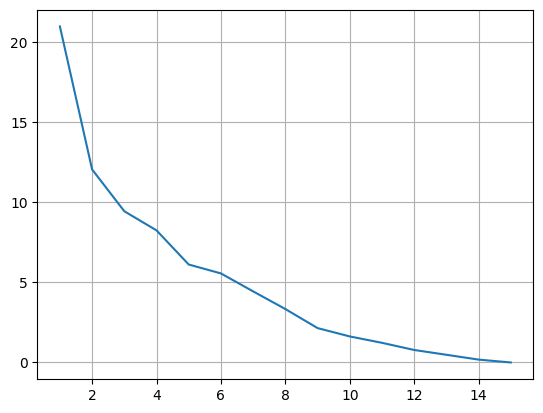

In [32]:
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
varirances = []
for k in K:
    GMM_tpt_k = GaussianMixture(n_components=k,covariance_type='diag').fit(temperatures)
    y_GMM_tpt_k = GMM_tpt_k.predict(temperatures)
    v= 0
    for i in range(k):
        cluster_points = temperatures[y_GMM_tpt_k == i]
        weight = len(cluster_points) / len(temperatures)
        v += weight * np.sum(np.std(cluster_points, axis=0))
    varirances.append(v)
pl.plot(K,varirances)
pl.grid()
pl.show()

- We can notice that the variance drops remarkably till the K=7 then the curve starts decreasing in a slower way which can help us deduce that K=6 or 7 is a good number of classes.

#### Case of Digits:

[0.4906208171049804, 0.5285780056995552, 0.690876552411236, 0.7888228101901416, 0.8785313938305958, 0.8521445490453962, 0.8790654668630467, 0.9227914745073416, 0.9340046514179997, 0.9448289945286545, 0.9624855624185459, 0.9812101104084531]


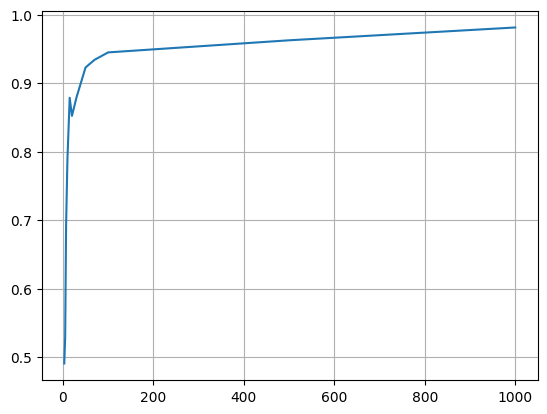

In [33]:
from sklearn.metrics import homogeneity_score

K = [3,5,7,10,15,20,30,50,70,100,500,1000]
homogeneity = []
for k in K:
    GMM_dgt_k = GaussianMixture(n_components=k,covariance_type='diag').fit(x)
    y_GMM_dgt_k = GMM_dgt_k.predict(x)
    homogeneity.append(homogeneity_score(y.reshape((3000,)),y_GMM_dgt_k))
print(homogeneity)
pl.plot(K,homogeneity)
pl.grid()
pl.show()

In [34]:
print(homogeneity[8])

0.9340046514179997


- We can see that the homogeneity factor increases remarkably until the value of K = 15 where the speed of increase starts to slow.

Lets see how is the distribution of the different classes in each claster for K = 15

In [35]:
best_K = K[8]
GMM_dgt_k = GaussianMixture(n_components=best_K,covariance_type='diag').fit(x)
y_GMM_dgt_k = GMM_dgt_k.predict(x)

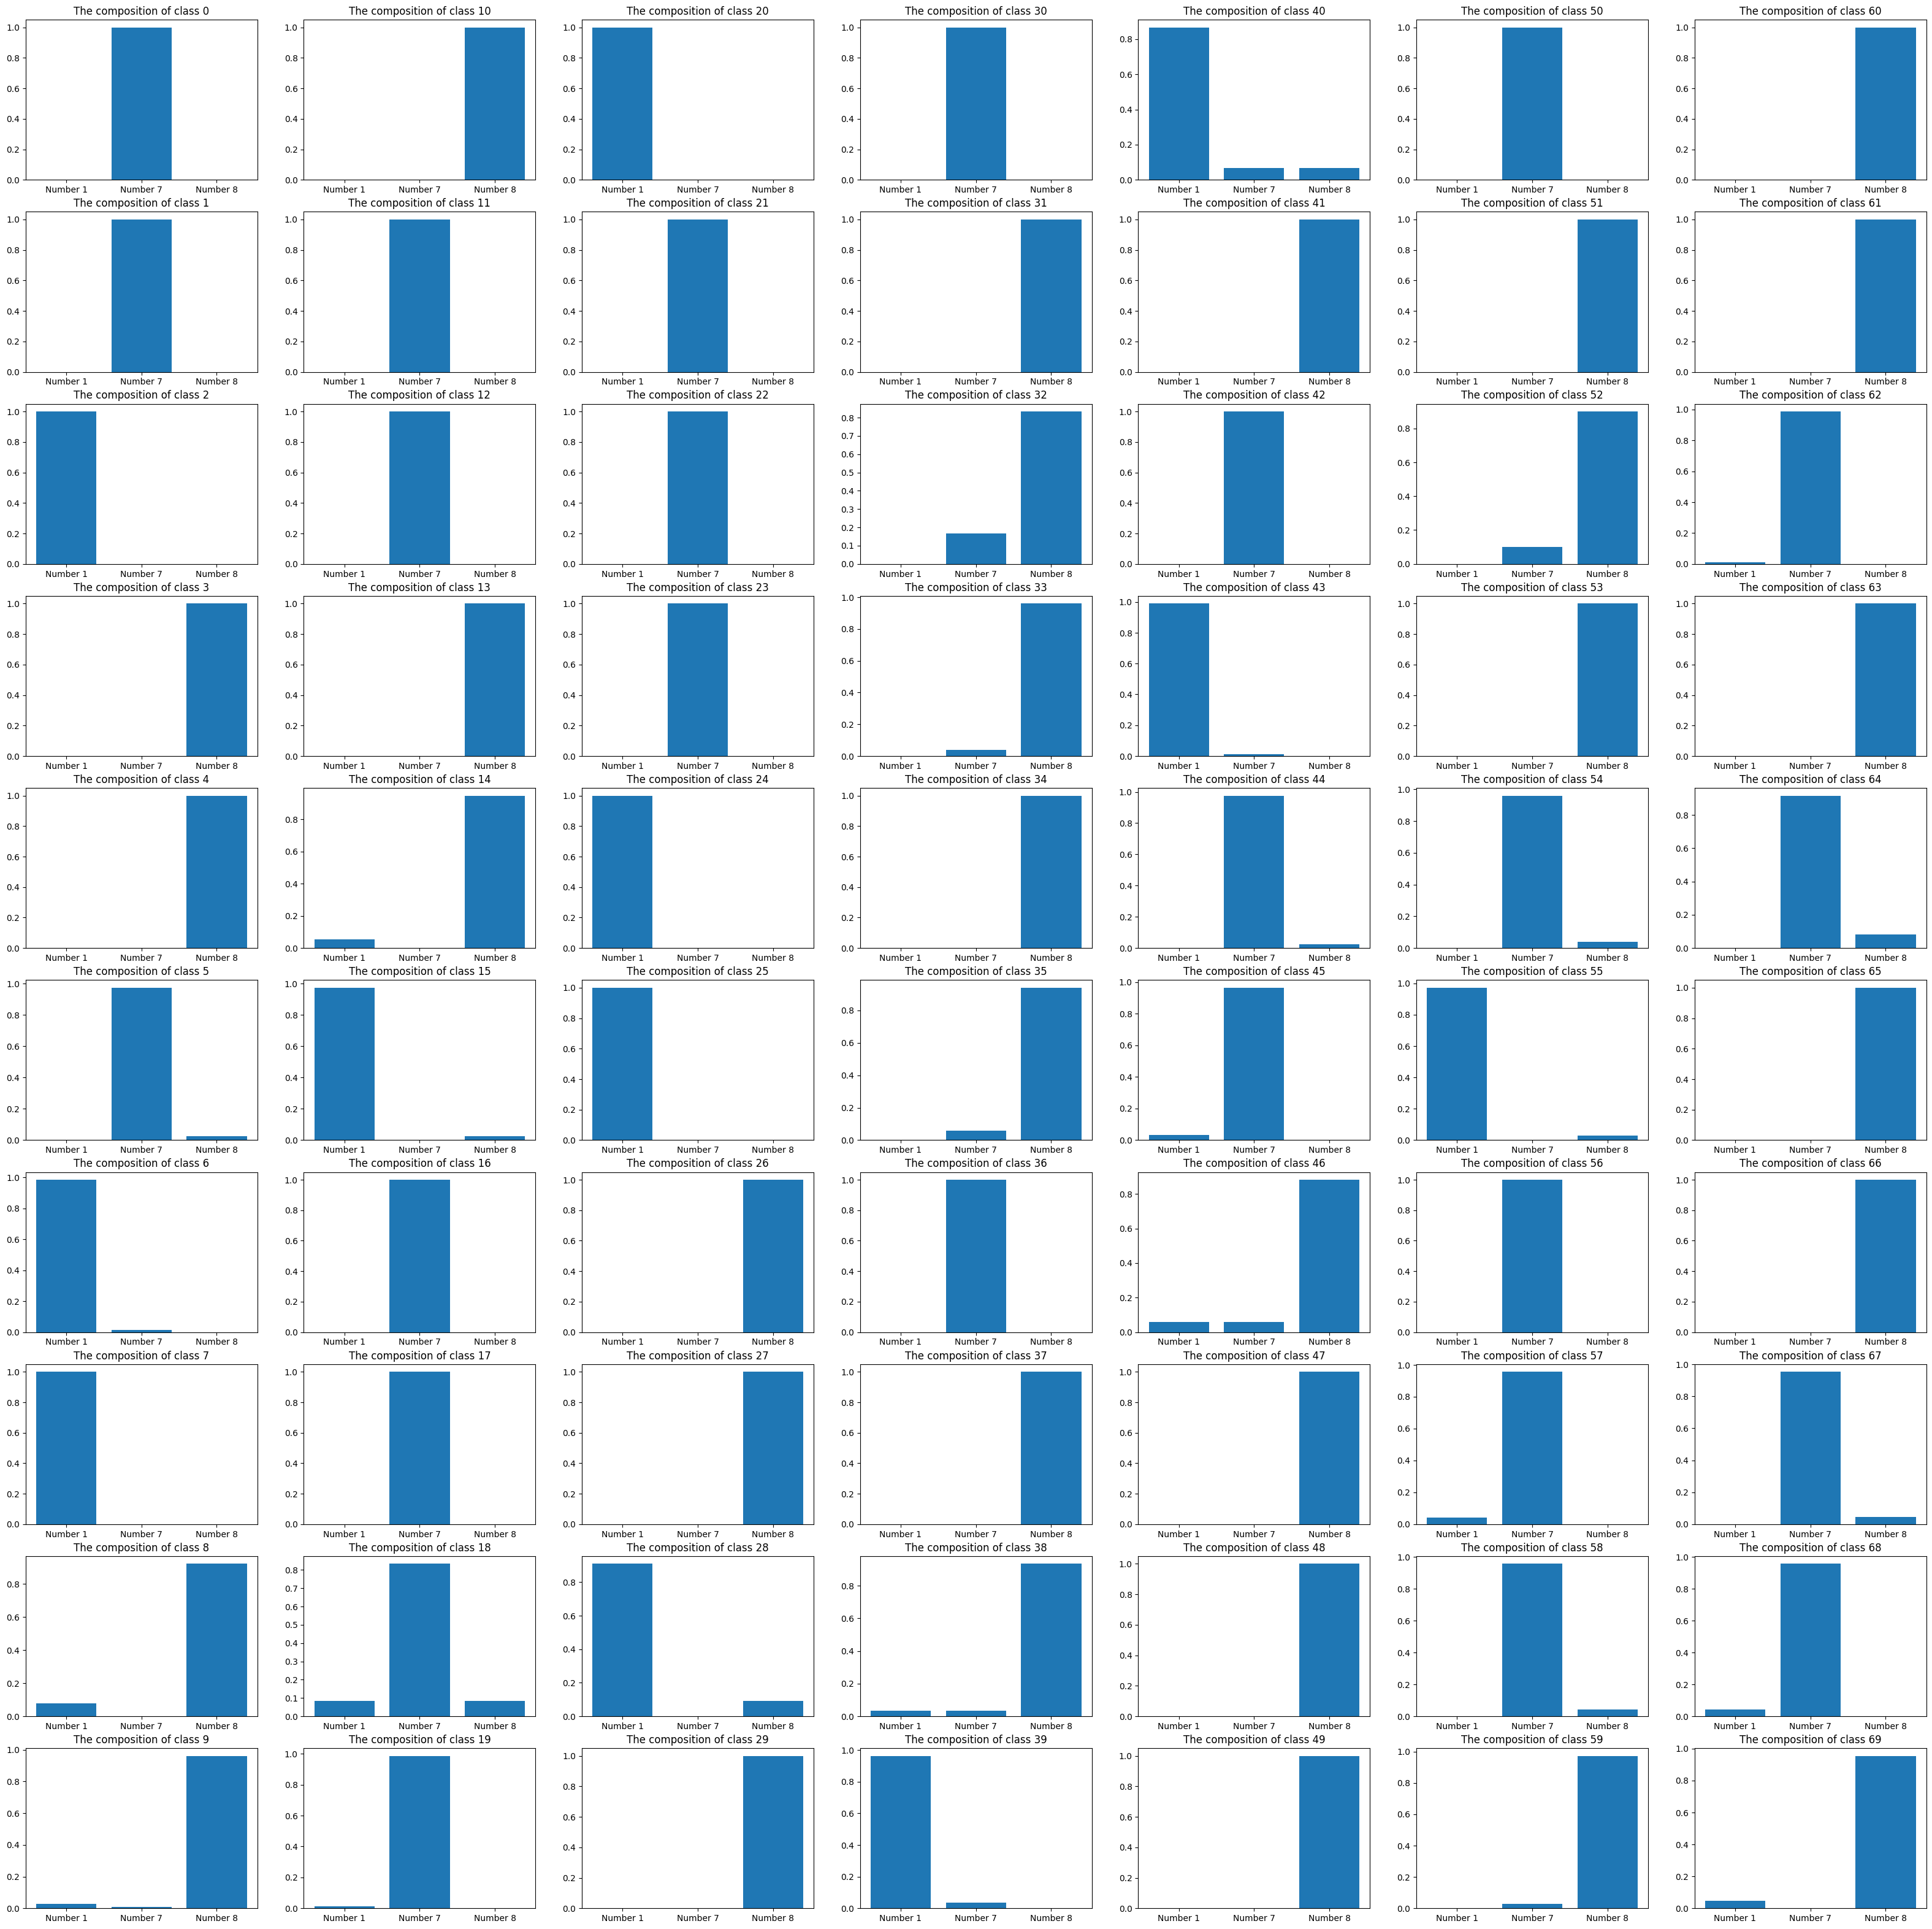

In [36]:
fig, axes = pl.subplots(10,7,figsize = (40,40))

for i in range(10):
    for j in range(7):
        vals = [np.sum(y[y_GMM_dgt_k==10*j+i]==l)/y[y_GMM_dgt_k==10*j+i].shape[0] for l in [1,7,8]]
        absices = ["Number 1", "Number 7", "Number 8"]
        axes[i][j].bar(absices,vals)
        axes[i][j].set_title("The composition of class "+str(10*j+i))

- Except 3 classes all the others are almost homogenious with a very high percentage.

### Lets try different types of covariance

#### Case of temperature

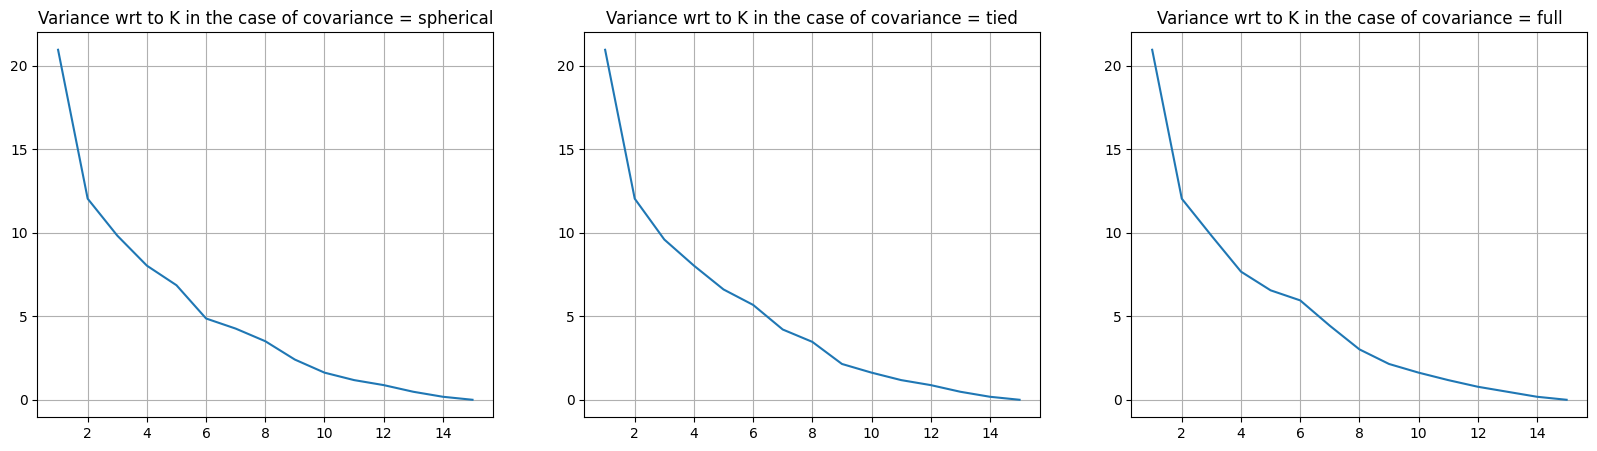

In [37]:
fig,axes = pl.subplots(1,3,figsize = (20,5))
j=0
for cov in ['spherical', 'tied', 'full']:
    K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    varirances = []
    for k in K:
        GMM_tpt_k = GaussianMixture(n_components=k,covariance_type=cov).fit(temperatures)
        y_GMM_tpt_k = GMM_tpt_k.predict(temperatures)
        v= 0
        for i in range(k):
            cluster_points = temperatures[y_GMM_tpt_k == i]
            weight = len(cluster_points) / len(temperatures)
            v += weight * np.sum(np.std(cluster_points, axis=0))
        varirances.append(v)
    axes[j].plot(K,varirances)
    axes[j].set_title("Variance wrt to K in the case of covariance = "+cov)
    axes[j].grid()
    j+=1

#### Case of Digits

In [38]:
K = [3,5,7,10,15,20,30,50,70,100,500,1000]
homogeneity = []
for k in K:
    GMM_dgt_k = GaussianMixture(n_components=k,covariance_type=cov).fit(x)
    y_GMM_dgt_k = GMM_dgt_k.predict(x)
    homogeneity.append(homogeneity_score(y.reshape((3000,)),y_GMM_dgt_k))
    #print(homogeneity)

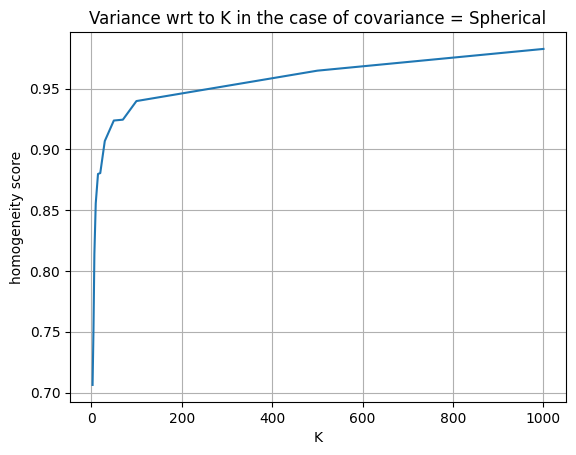

In [39]:
pl.plot(K,homogeneity)
pl.title("Variance wrt to K in the case of covariance = Spherical")
pl.xlabel("K")
pl.ylabel("homogeneity score")
pl.grid()

In [40]:
print(homogeneity)

[0.706245929511449, 0.7518346834932674, 0.8138755159410219, 0.855539760430124, 0.8797584123041045, 0.880477178363929, 0.9068043490076487, 0.9237003949270898, 0.9244032912096249, 0.9397161697188257, 0.9647104722042338, 0.9825955268674436]


Even when we change the conv we get the appriximatly the same results

### still have to do questions 4,5,6 of the GMM part

## 4-1 Linear Projection : Principal Component Analysis

### 1 - Covariance Matrix:

#### a - Case of Temperature:

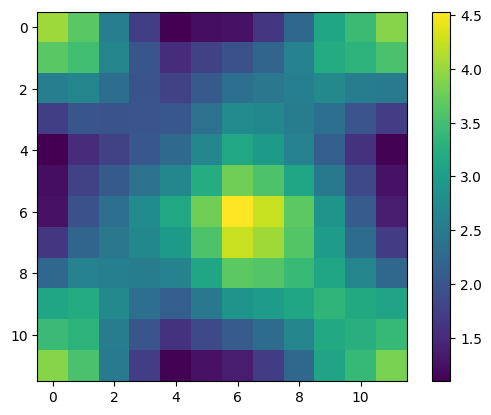

In [41]:
C_tpt = np.cov(temperatures.T)
pl.imshow(C_tpt)
pl.colorbar()

**Comment :**
- We can notice a high correletion between the monthes Octorber ,November, December,january,february. Which makes sence, since the temperature in general raises in those mothes which correspond to automn and winter so in France they are in general always cold.
- We can also notice that there is an interesting correlation between the temperatures of the monthes Juin, Jully and August which makes sence since these monthes caracterize summer which is known with its high temperatures (relativly hot weather).
- We can also notice a negative correlation between the temperatures of the monthes (November, December, January, February,) and (April ,May, June, Jully, August) which means that the temperature in these two monthes is inversly corelated. This makes sence because the first group of monthes is known to be cold in France while the second group is know to be relativly hot (high temperatures).

#### b - Case of Digits

(3000, 784)
(784, 784)


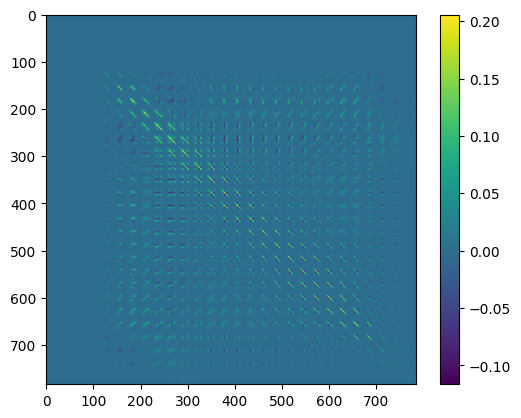

In [42]:
C_dgt = np.cov(x.T)
print(x.shape)
print(C_dgt.shape)
pl.imshow(C_dgt)
pl.colorbar()
pl.show()

**Comments :**

- We can notice that there is almost zero correlation between many pixels. For instance, pixels located in the upper or lower borders of the image are nearly uncorrelated with all other pixels. This makes sense, since these regions usually correspond to background areas that remain constant across samples, whereas the central pixels where the handwritten strokes appear vary much more.

- We can also observe a bright correlation along the diagonal of the matrix. This is partly because each pixel is perfectly correlated with itself, but also because neighboring pixels exhibit strong correlations due to the spatial continuity of brightness in handwritten digits.

### 2 - PCA:

#### Case of Temperature :

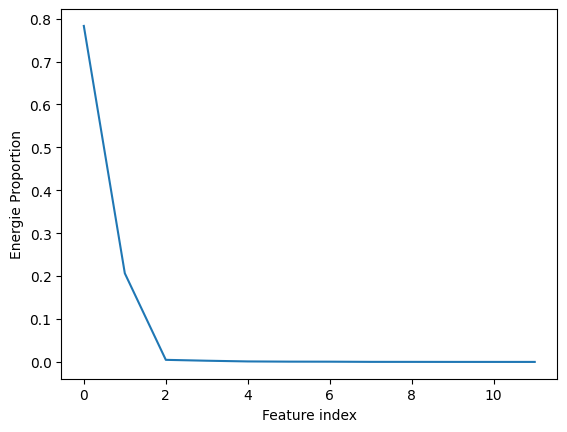

In [43]:
from sklearn.decomposition import PCA

pca_tpt = PCA(n_components=None)
X_pca_tpt = pca_tpt.fit_transform(temperatures)
variance_ration = pca_tpt.explained_variance_ratio_
pl.plot(variance_ration)
pl.xlabel("Feature index")
pl.ylabel("Energie Proportion")
pl.show()

In [44]:
print("The energie expressed by the first two features is",variance_ration[0]+variance_ration[1])

The energie expressed by the first two features is 0.9896802035903165


**Comment :**
- We can observe that the proportion of variance explained by the first two principal components is sufficient to represent the data, as their combined explained variance accounts for nearly ~99% of the total energy.
- This indicates that the remaining components (from the 3rd to the 12th) are redundant.
- In other words, although the data originally lies in a 12-dimensional space, its effective dimensionality is only two.
- If we imagine it in three dimensions for simplicity, the points would approximately lie on a 2D plane, with the third axis carrying almost no additional information.

#### Case of Digits :

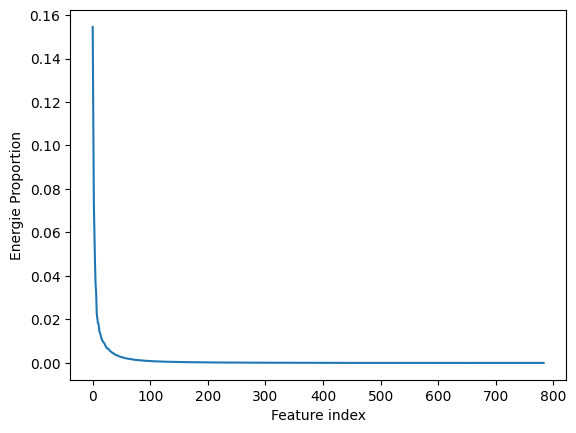

In [45]:
from sklearn.decomposition import PCA

pca_dgt = PCA(n_components=None)
X_pca_dgt = pca_dgt.fit_transform(x)
variance_ration = pca_dgt.explained_variance_ratio_
pl.plot(variance_ration)
pl.xlabel("Feature index")
pl.ylabel("Energie Proportion")
pl.show()

In [46]:
variance_ratio = pca_dgt.explained_variance_ratio_
print("The energie expressed by the first two features is",variance_ratio[0]+variance_ratio[1])
s = 0
for i,e in enumerate(variance_ratio):
    s+=e
    if s>=0.95:
        print(r"If we want to explain 95% of the data we need "+str(i+1)+" features")
        break

The energie expressed by the first two features is 0.2695057794431232
If we want to explain 95% of the data we need 128 features


**Comment :**
- In the case of the Digits dataset, the first two principal components explain only about 27% of the total variance.
- If we want to explain 95% of the data we need at least 128 features.
- This means that considering only these two components would result in a significant loss of information, as a large portion of the data variability is captured by the remaining components.

### 3 - Projection in 2 dimensions :

#### Case of Temperature :

In [47]:
pca_tpt_2d = PCA(n_components=2)
X_tpt_2d = pca_tpt_2d.fit_transform(temperatures)
print(X_tpt_2d.shape)

(15, 2)


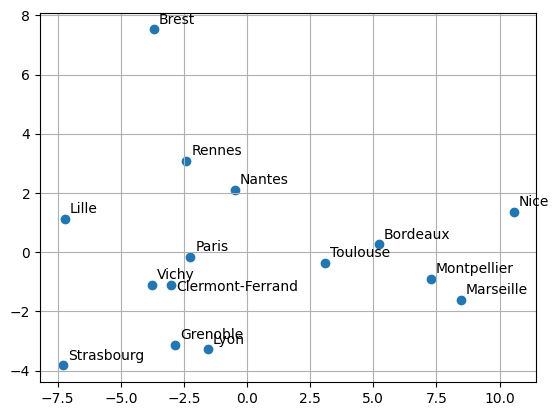

In [48]:
pl.scatter(X_tpt_2d[:,0],X_tpt_2d[:,1])
for i, ville in enumerate(villes):
    if ville =="Clermont-Ferrand":
        pl.text(X_tpt_2d[i,0]+0.2,X_tpt_2d[i,1]-0.2,ville)
    else:
        pl.text(X_tpt_2d[i,0]+0.2,X_tpt_2d[i,1]+0.2,ville)
pl.grid()

**Comment :**
- The 2D PCA projection shown above does not correspond to the geographical positions of the cities. Instead, it represents their similarities based on temperature data.
- This projection captures around 98% of the total variance, meaning it preserves almost all the climatic information present in the original dataset.
- From this new representation, we can visually identify meaningful groupings. For example, Toulouse, Bordeaux, Montpellier, Nice, and Marseille appear very close to each other, indicating that they share similar temperature profiles throughout the year, all belonging to the southern and warmer parts of France.

**Lets try to confirm our ramarks using a Kmeans on projected data:**

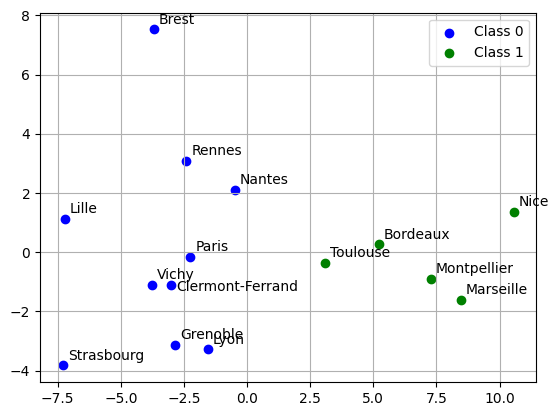

In [49]:
Kmeans_pca_tpt = KMeans(n_clusters=2).fit(temperatures)
labels = Kmeans_pca_tpt.labels_
colors = ['blue', 'green']
x_tpt = X_tpt_2d[:,0]
y_tpt = X_tpt_2d[:,1]
for i in range(2):
    pl.scatter(x_tpt[labels==i], y_tpt[labels==i], color=colors[i], label=f'Class {i}')
for i, ville in enumerate(villes):
    if ville =="Clermont-Ferrand":
        pl.text(X_tpt_2d[i,0]+0.2,X_tpt_2d[i,1]-0.2,ville)
    else:
        pl.text(X_tpt_2d[i,0]+0.2,X_tpt_2d[i,1]+0.2,ville)
pl.legend()
pl.grid()


- This is exactly what we visualy noticed this was confirmed using Kmeans.

#### Case of Digits :

In [ ]:
pca_dgt_2d = PCA(n_components=2)
X_dgt_2d = pca_dgt_2d.fit_transform(x)
print(X_dgt_2d.shape)

(3000, 2)


Text(0.5, 1.0, 'Plot of the digit classes based on the 2d projection')

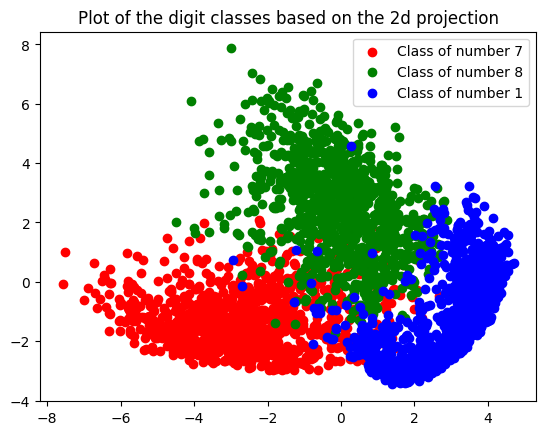

In [51]:
colors = ['red', 'green', 'blue']
x_dgt = X_dgt_2d[:,0]
y_dgt = X_dgt_2d[:,1]
for j,i in enumerate([7,8,1]):
    labels = (y==i).reshape((3000,))
    pl.scatter(x_dgt[labels], y_dgt[labels], color=colors[j], label=f'Class of number {i}')
pl.legend()
pl.title("Plot of the digit classes based on the 2d projection")

Text(0.5, 0.98, 'Seperated plots for better visualisation')

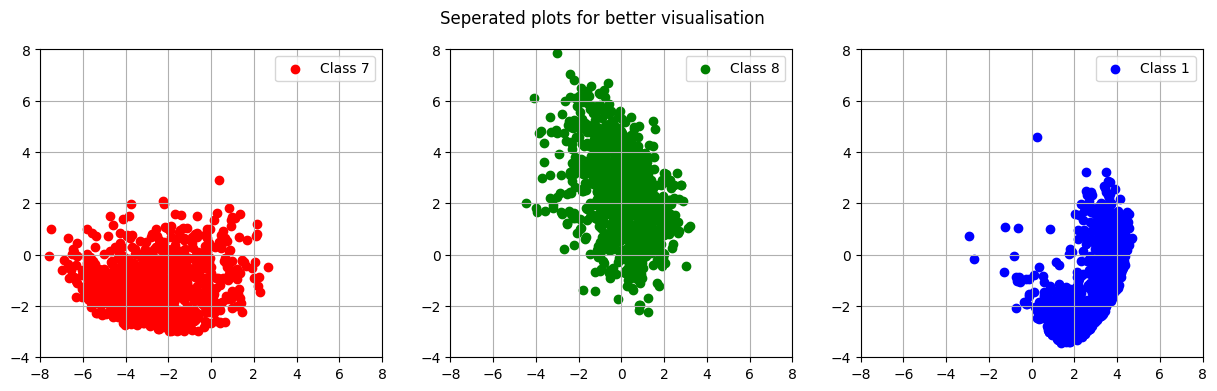

In [52]:
fig, axes = pl.subplots(1,3,figsize=(15,4))
colors = ['red', 'green', 'blue']
x_dgt = X_dgt_2d[:,0]
y_dgt = X_dgt_2d[:,1]
for j,i in enumerate([7,8,1]):
    labels = (y==i).reshape((3000,))
    axes[j].scatter(x_dgt[labels], y_dgt[labels], color=colors[j], label=f'Class {i}')
    axes[j].set_xlim(-8, 8)
    axes[j].set_ylim(-4,8)
    axes[j].legend()
    axes[j].grid()
pl.suptitle("Seperated plots for better visualisation")

**Comments :**

- Using the diffent plots and only the first two features based on there energie, we can notice that :
  - If a data point has its first feature < -5 it is for sure a 7.
  - if a data point has its first feature > 4 it is for sure a 1.
  - If a data point has its second feature >5 it is for sure an 8.
  - Other wise for the rest of data points it is hard to decide since there are a lot of culusion between the different classes.

### 4 - Two first Principal Directions :

#### Case of Temperature :

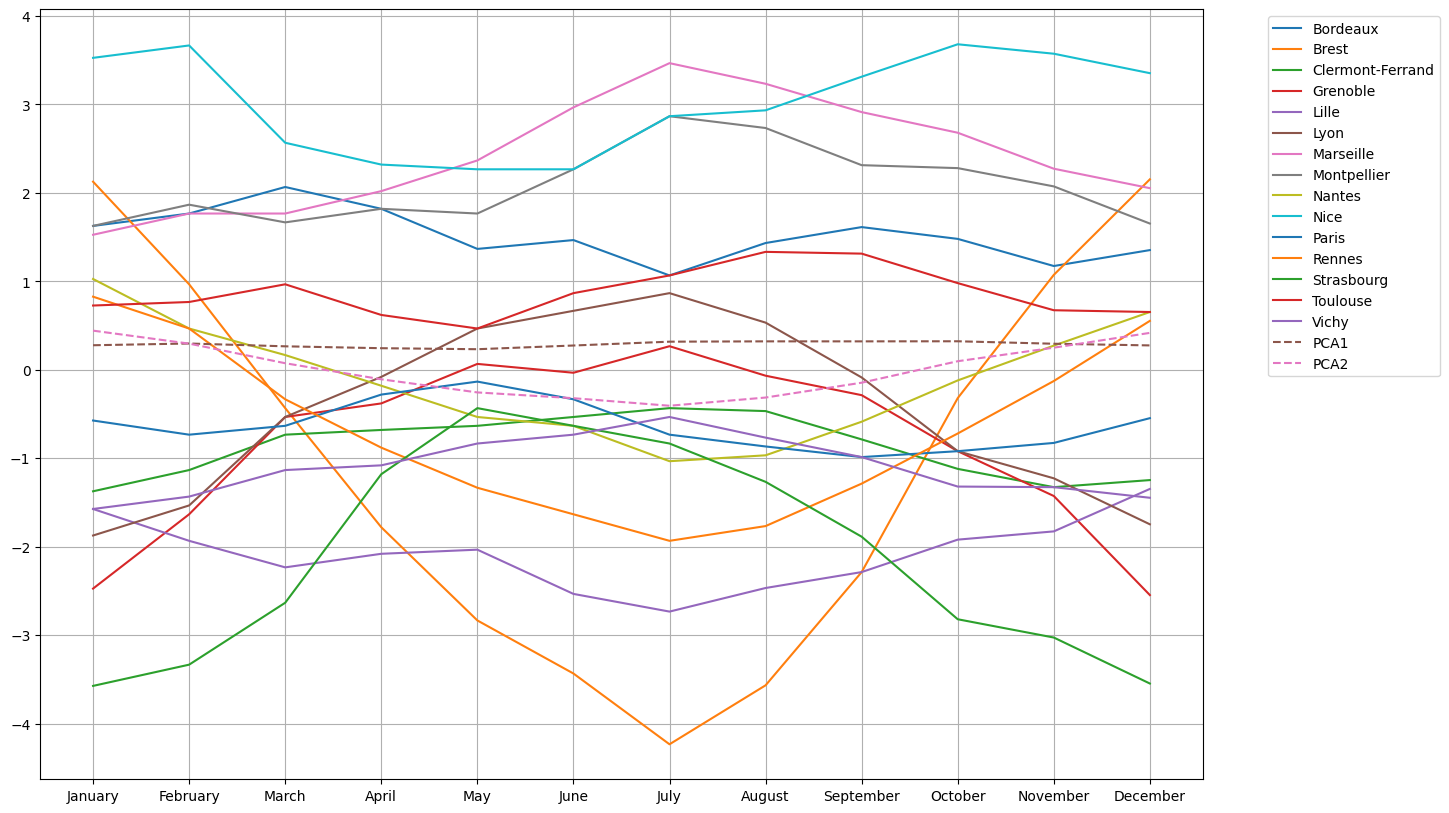

In [53]:
pl.figure(figsize=(15,10))
directions_tpt = pca_tpt_2d.components_
centered_temperatures = temperatures - temperatures.mean(axis=0)
normalized_temperatures = centered_temperatures
pl.plot(monthes,normalized_temperatures.T)
pl.plot(monthes,directions_tpt.T,linestyle = 'dashed')
directions = ["PCA1","PCA2"]
labels = np.concatenate((villes,directions))
pl.legend(labels,loc='upper left', bbox_to_anchor=(1.05, 1))
pl.grid()
pl.show()

#### Case of Temperature :

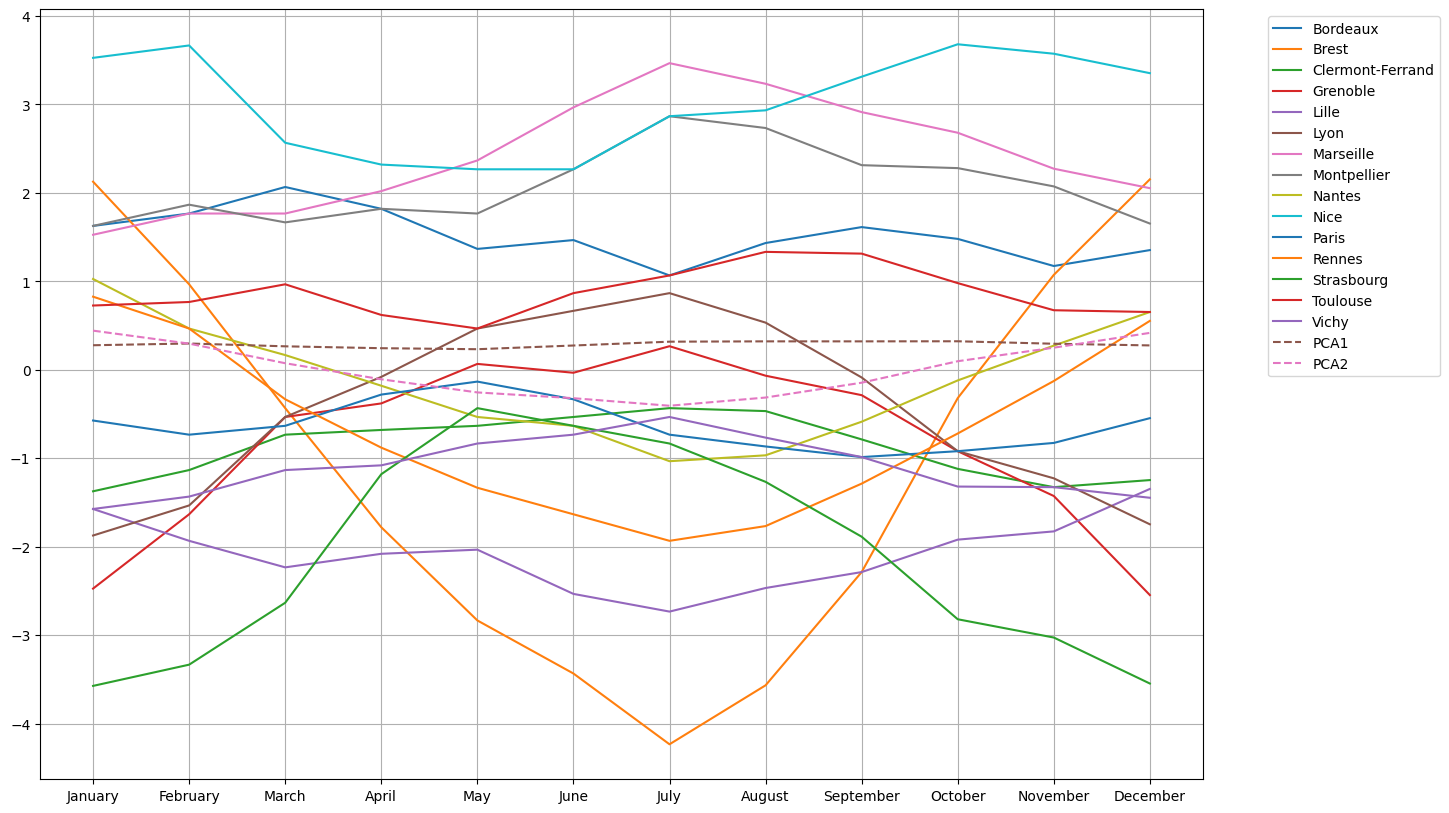

In [54]:
pl.figure(figsize=(15,10))
directions_tpt = pca_tpt_2d.components_
centered_temperatures = temperatures - temperatures.mean(axis=0)
pl.plot(monthes,centered_temperatures.T)
pl.plot(monthes,directions_tpt.T,linestyle = 'dashed')
directions = ["PCA1","PCA2"]
labels = np.concatenate((villes,directions))
pl.legend(labels,loc='upper left', bbox_to_anchor=(1.05, 1))
pl.grid()
pl.show()

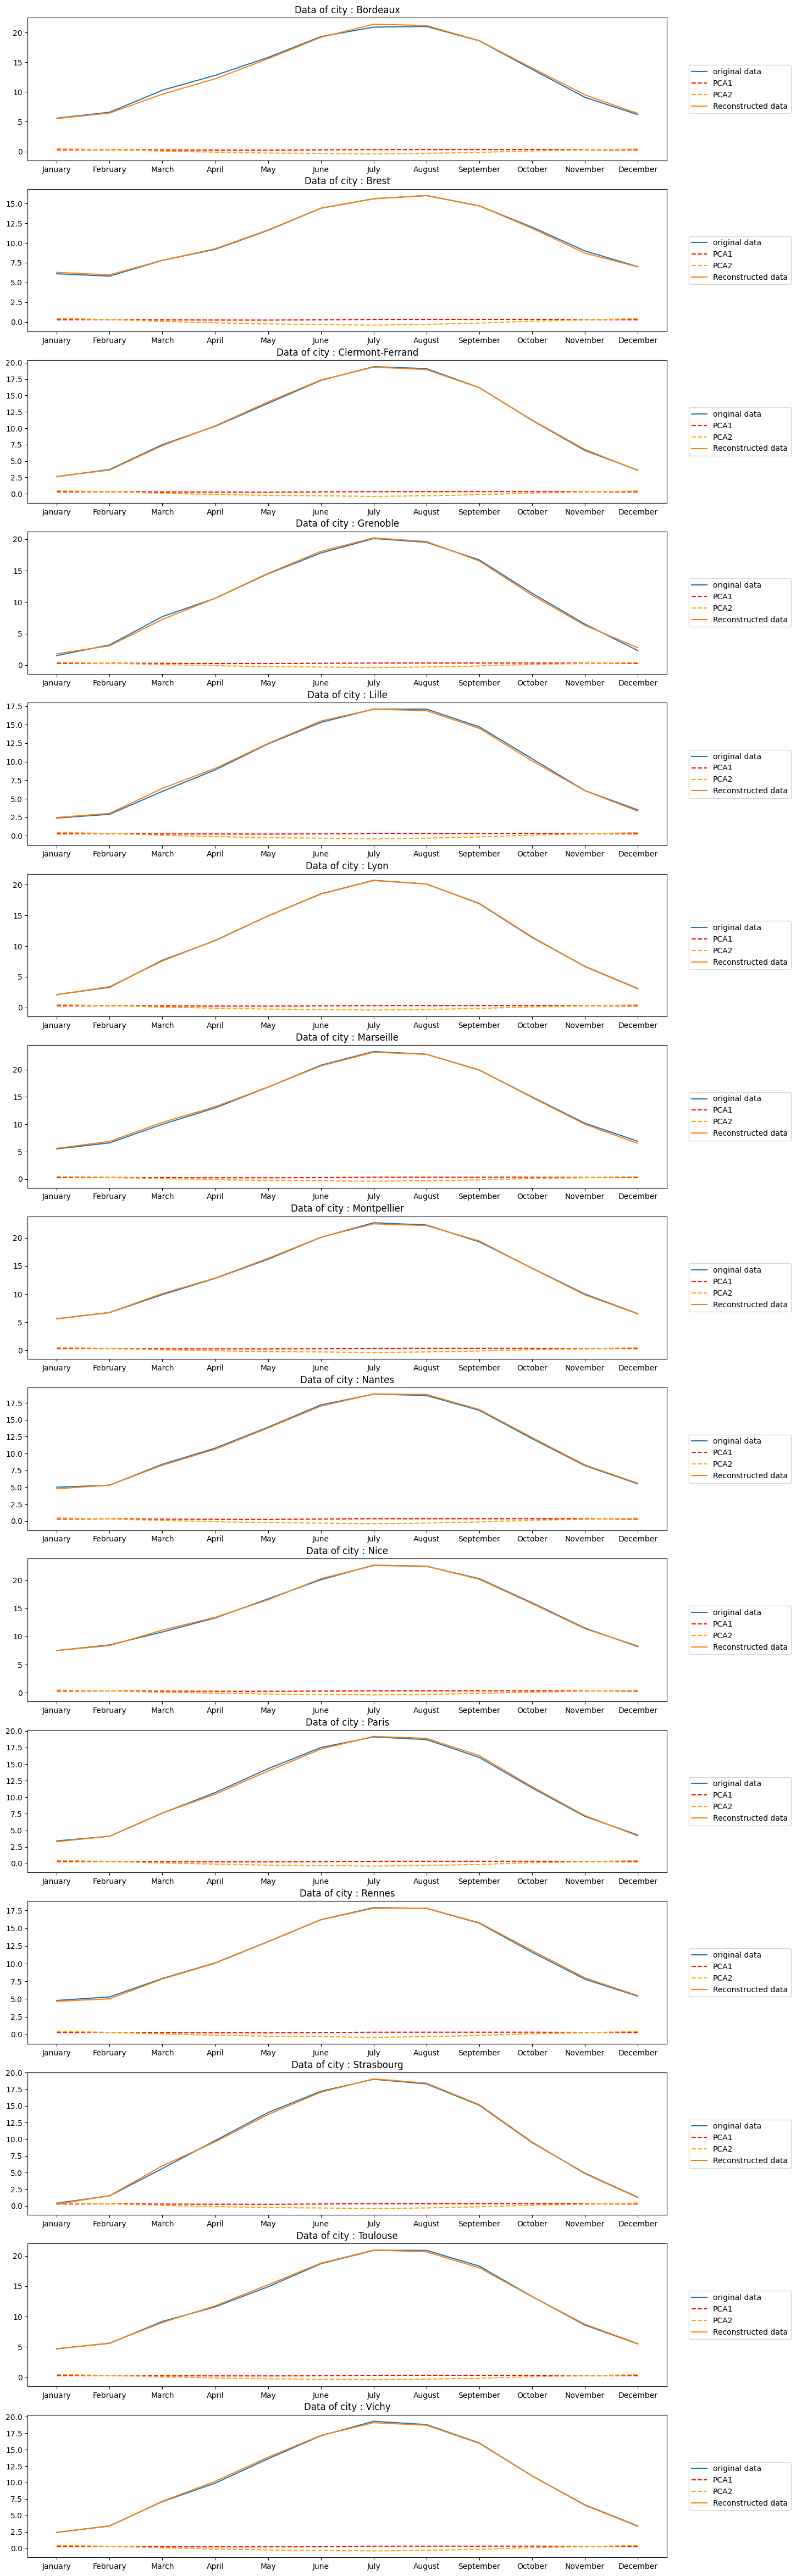

In [55]:
fig,axes = pl.subplots(15,1,figsize=(15,60))
for i in range(15):
    axes[i].plot(monthes,temperatures[i].T)
    axes[i].plot(monthes,directions_tpt[0].T,linestyle = 'dashed',color = 'red')
    axes[i].plot(monthes,directions_tpt[1].T,linestyle = 'dashed',color = 'orange')
    new_signal =   pca_tpt_2d.inverse_transform(X_tpt_2d[i])
    axes[i].plot(monthes,new_signal.T)
    axes[i].legend(['original data','PCA1','PCA2','Reconstructed data'],loc='right',bbox_to_anchor=(1.2, 0.5))
    axes[i].set_title("Data of city : "+villes[i])

**Comments :**
- As we can see, the first principal component descibes how constant the temparature is in the whole year since it caries approximatly constant values through all the monthes.
- while the second principle component discribes the variantion of temperature between summer and winter in a continuous way.
- so the combination of these two components gives us a good approximation of the original signal.

#### Case of Digits :

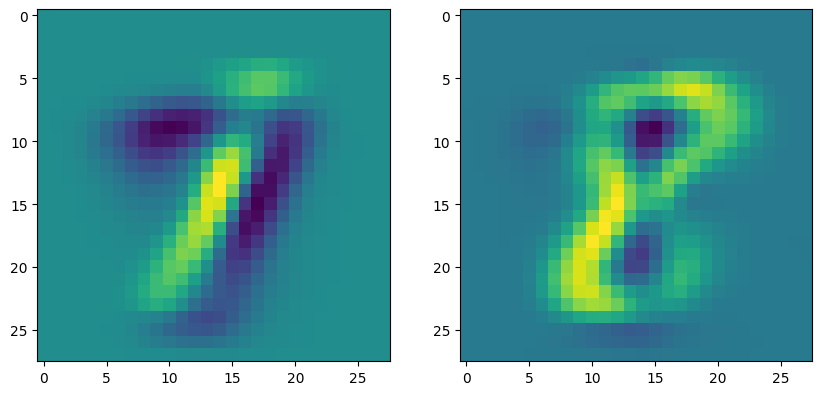

In [56]:
fig,axes = pl.subplots(1,2,figsize=(10,5))
directions_dgt = pca_dgt_2d.components_
axes[0].imshow(directions_dgt[0].reshape(28,28))
axes[1].imshow(directions_dgt[1].reshape(28,28))

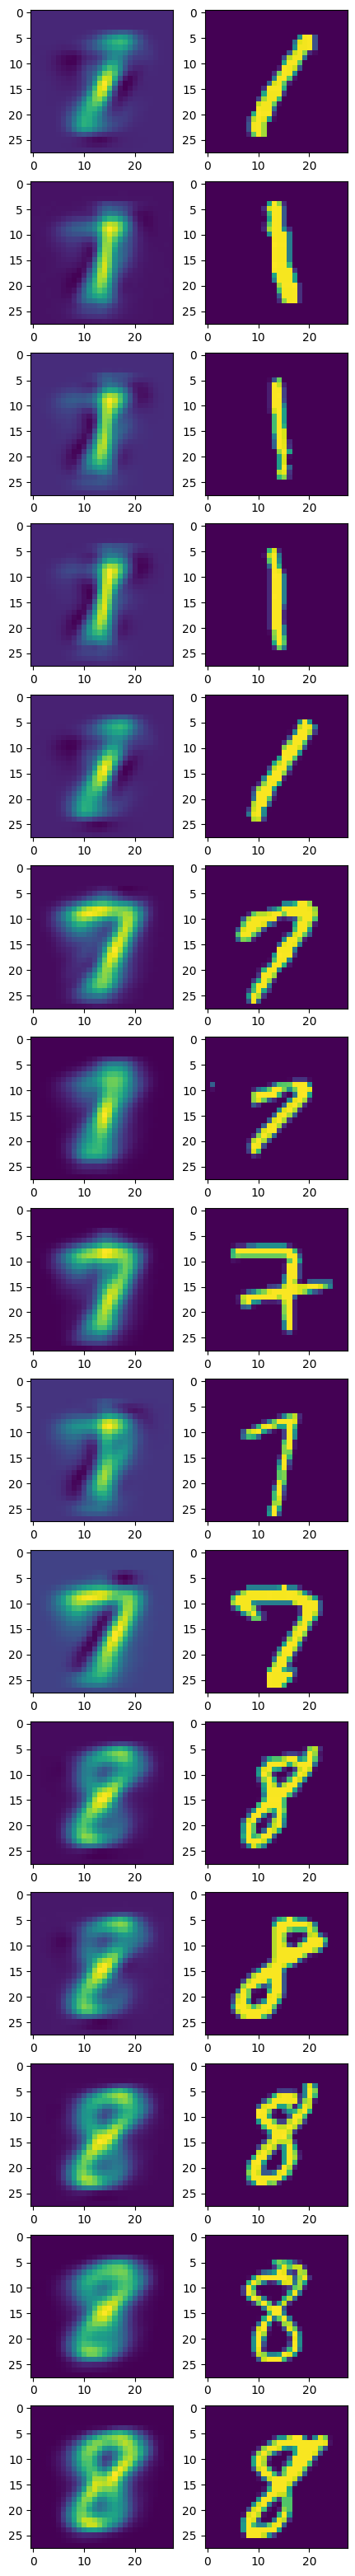

In [57]:
fig,axes = pl.subplots(15,2,figsize=(5,40))
for k in range(3):
    for i in range(5):
            index = 1000*k+i
            constructed = pca_dgt_2d.inverse_transform(X_dgt_2d[index])
            axes[5*k+i][0].imshow(constructed.reshape(28,28))
            axes[5*k+i][1].imshow(x[index].reshape(28,28))
    
        
    

**Comments :**

- The reconstruction quality is poor because the first two principal components do not capture enough of the total variance. They mainly describe broad structural patterns shared across digits rather than the detailed features that distinguish each class.
- The first component seems to represent a generic vertical stroke (similar to digits 1 or 7), while the second captures a closed or looped structure (similar to digits 8). 
- Thus, using only these two principale components leads to reconstructions that look like a blend of several digits.

### Reconstruction using different values of Projection Dimension :

#### Case of Temperature

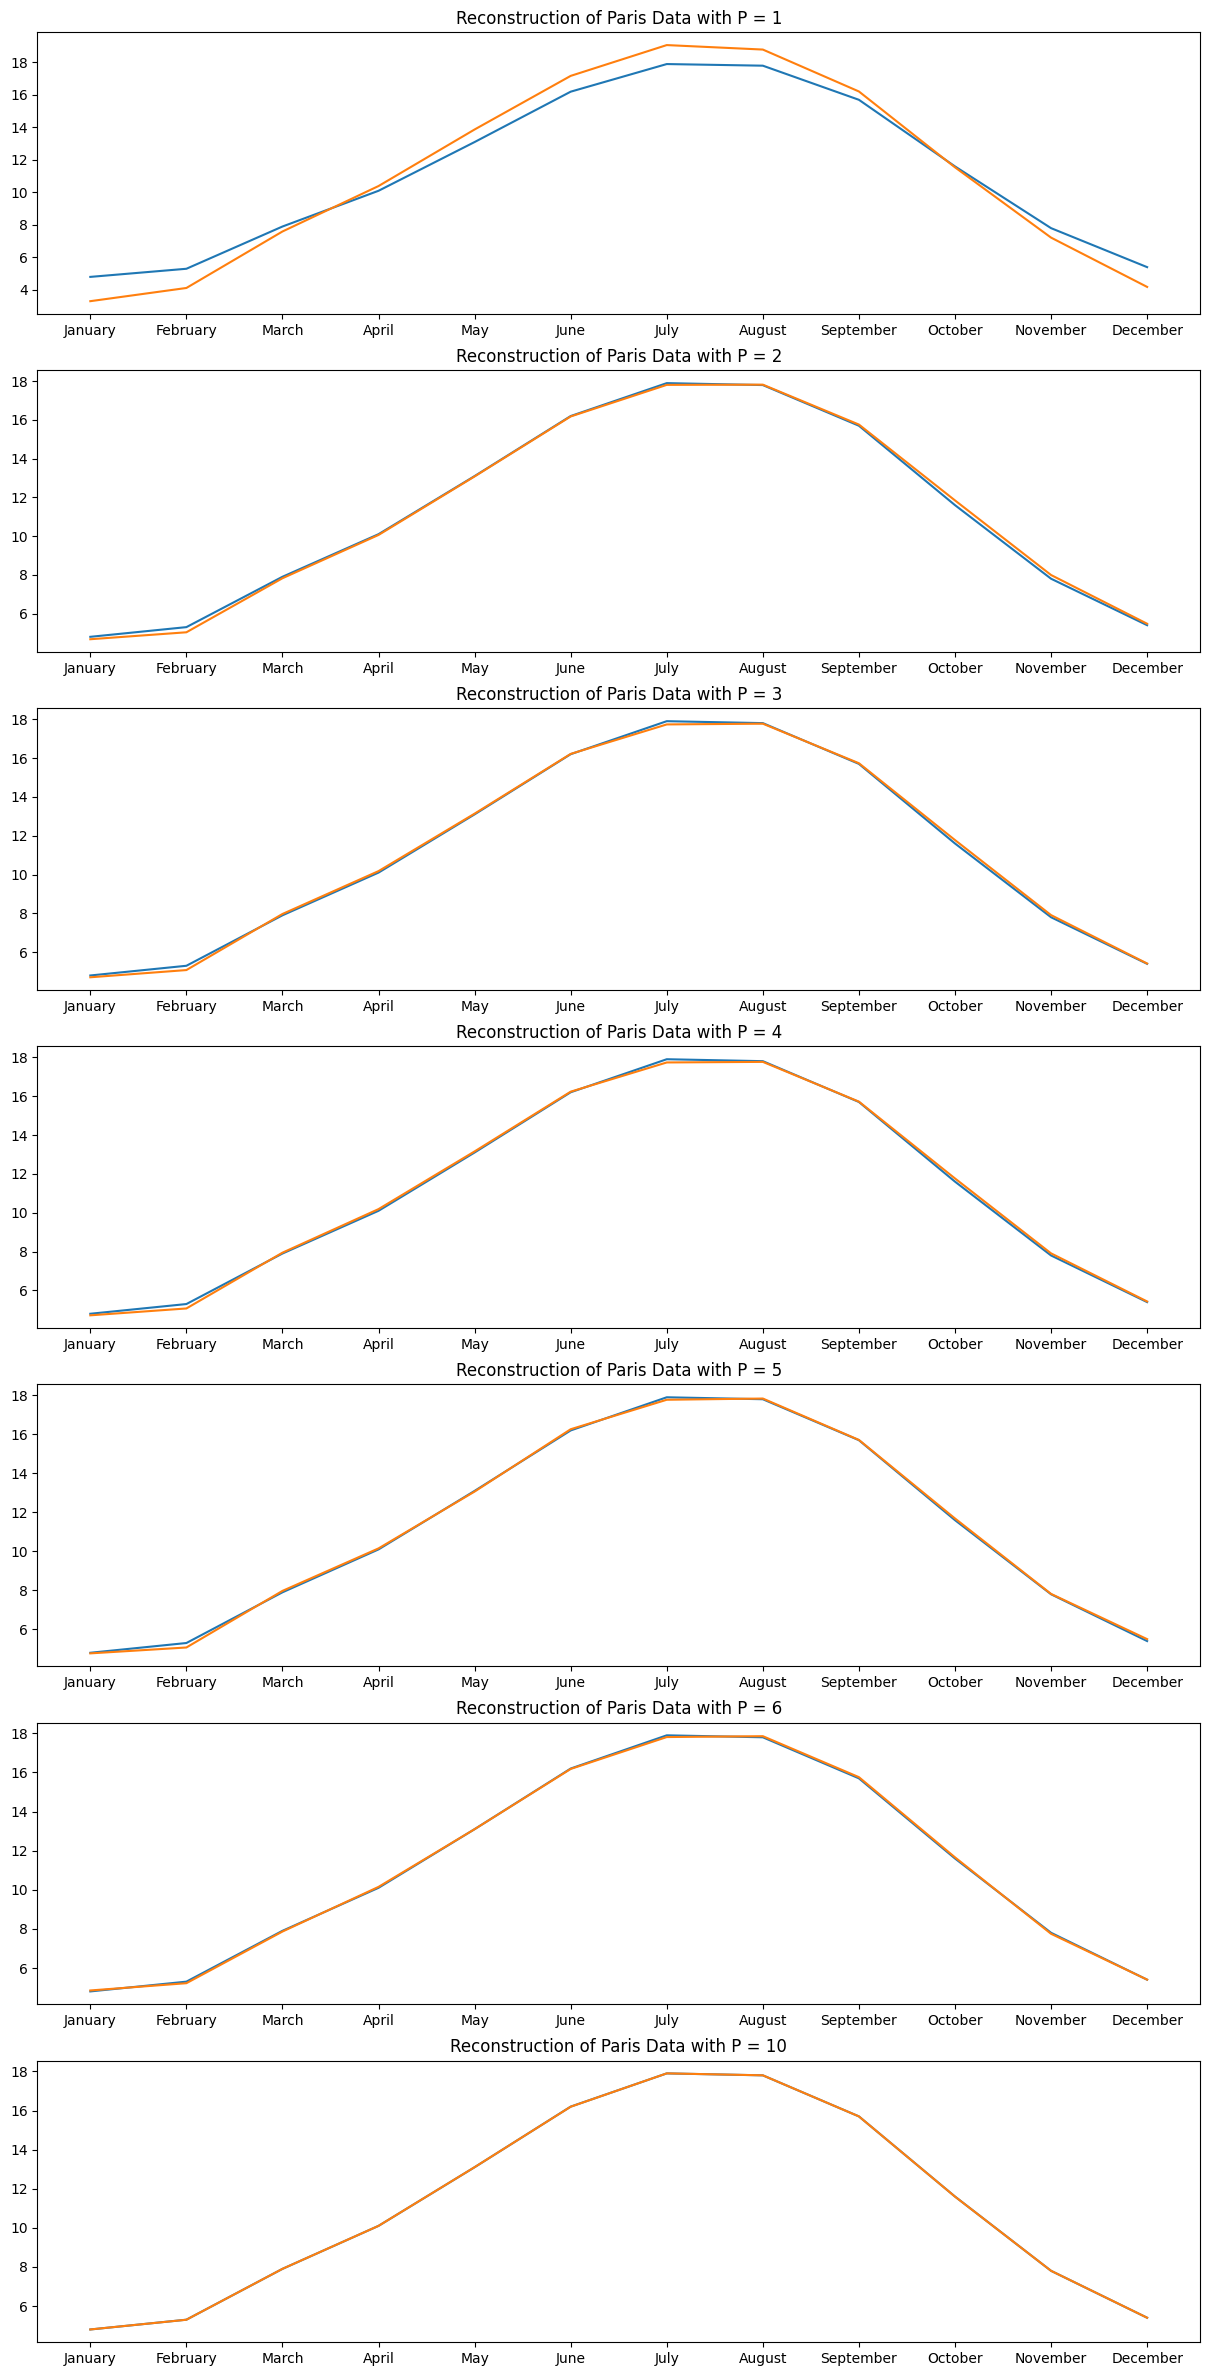

In [58]:
# we are going to work with Paris data 
D = [1,2,3,4,5,6,10]
lst_reconstructions = []
for d in D:
    pca_d = PCA(n_components=d)
    Z = pca_d.fit_transform(temperatures)
    lst_reconstructions.append(pca_d.inverse_transform(Z[11]))
fig, axes = pl.subplots(len(D),1,figsize=(15,30))
for i in range(len(D)):
    axes[i].plot(monthes,temperatures[11].T)
    axes[i].plot(monthes,lst_reconstructions[i].T)
    axes[i].set_title("Reconstruction of Paris Data with P = "+str(D[i]))

**Comment :**

- As we have said before, for a value of p=2 and above the value of the reconstuction is very good.

#### Case of Digits :

In [59]:
cumul_variance_ratio = []
s = 0
for e in variance_ratio:
    s+=e
    cumul_variance_ratio.append(s)

In [60]:
D = [4,7,10,20,50,100,150,200,400]
lst_reconstructions = []
lst_origin = []
lst_variance = []
for d in D:
    pca_d = PCA(n_components=d)
    Z = pca_d.fit_transform(x)
    idx = np.random.randint(0,3000,size = 1)
    lst_reconstructions.append(pca_d.inverse_transform(Z[idx]))
    lst_origin.append(x[idx])
    lst_variance.append(cumul_variance_ratio[d])

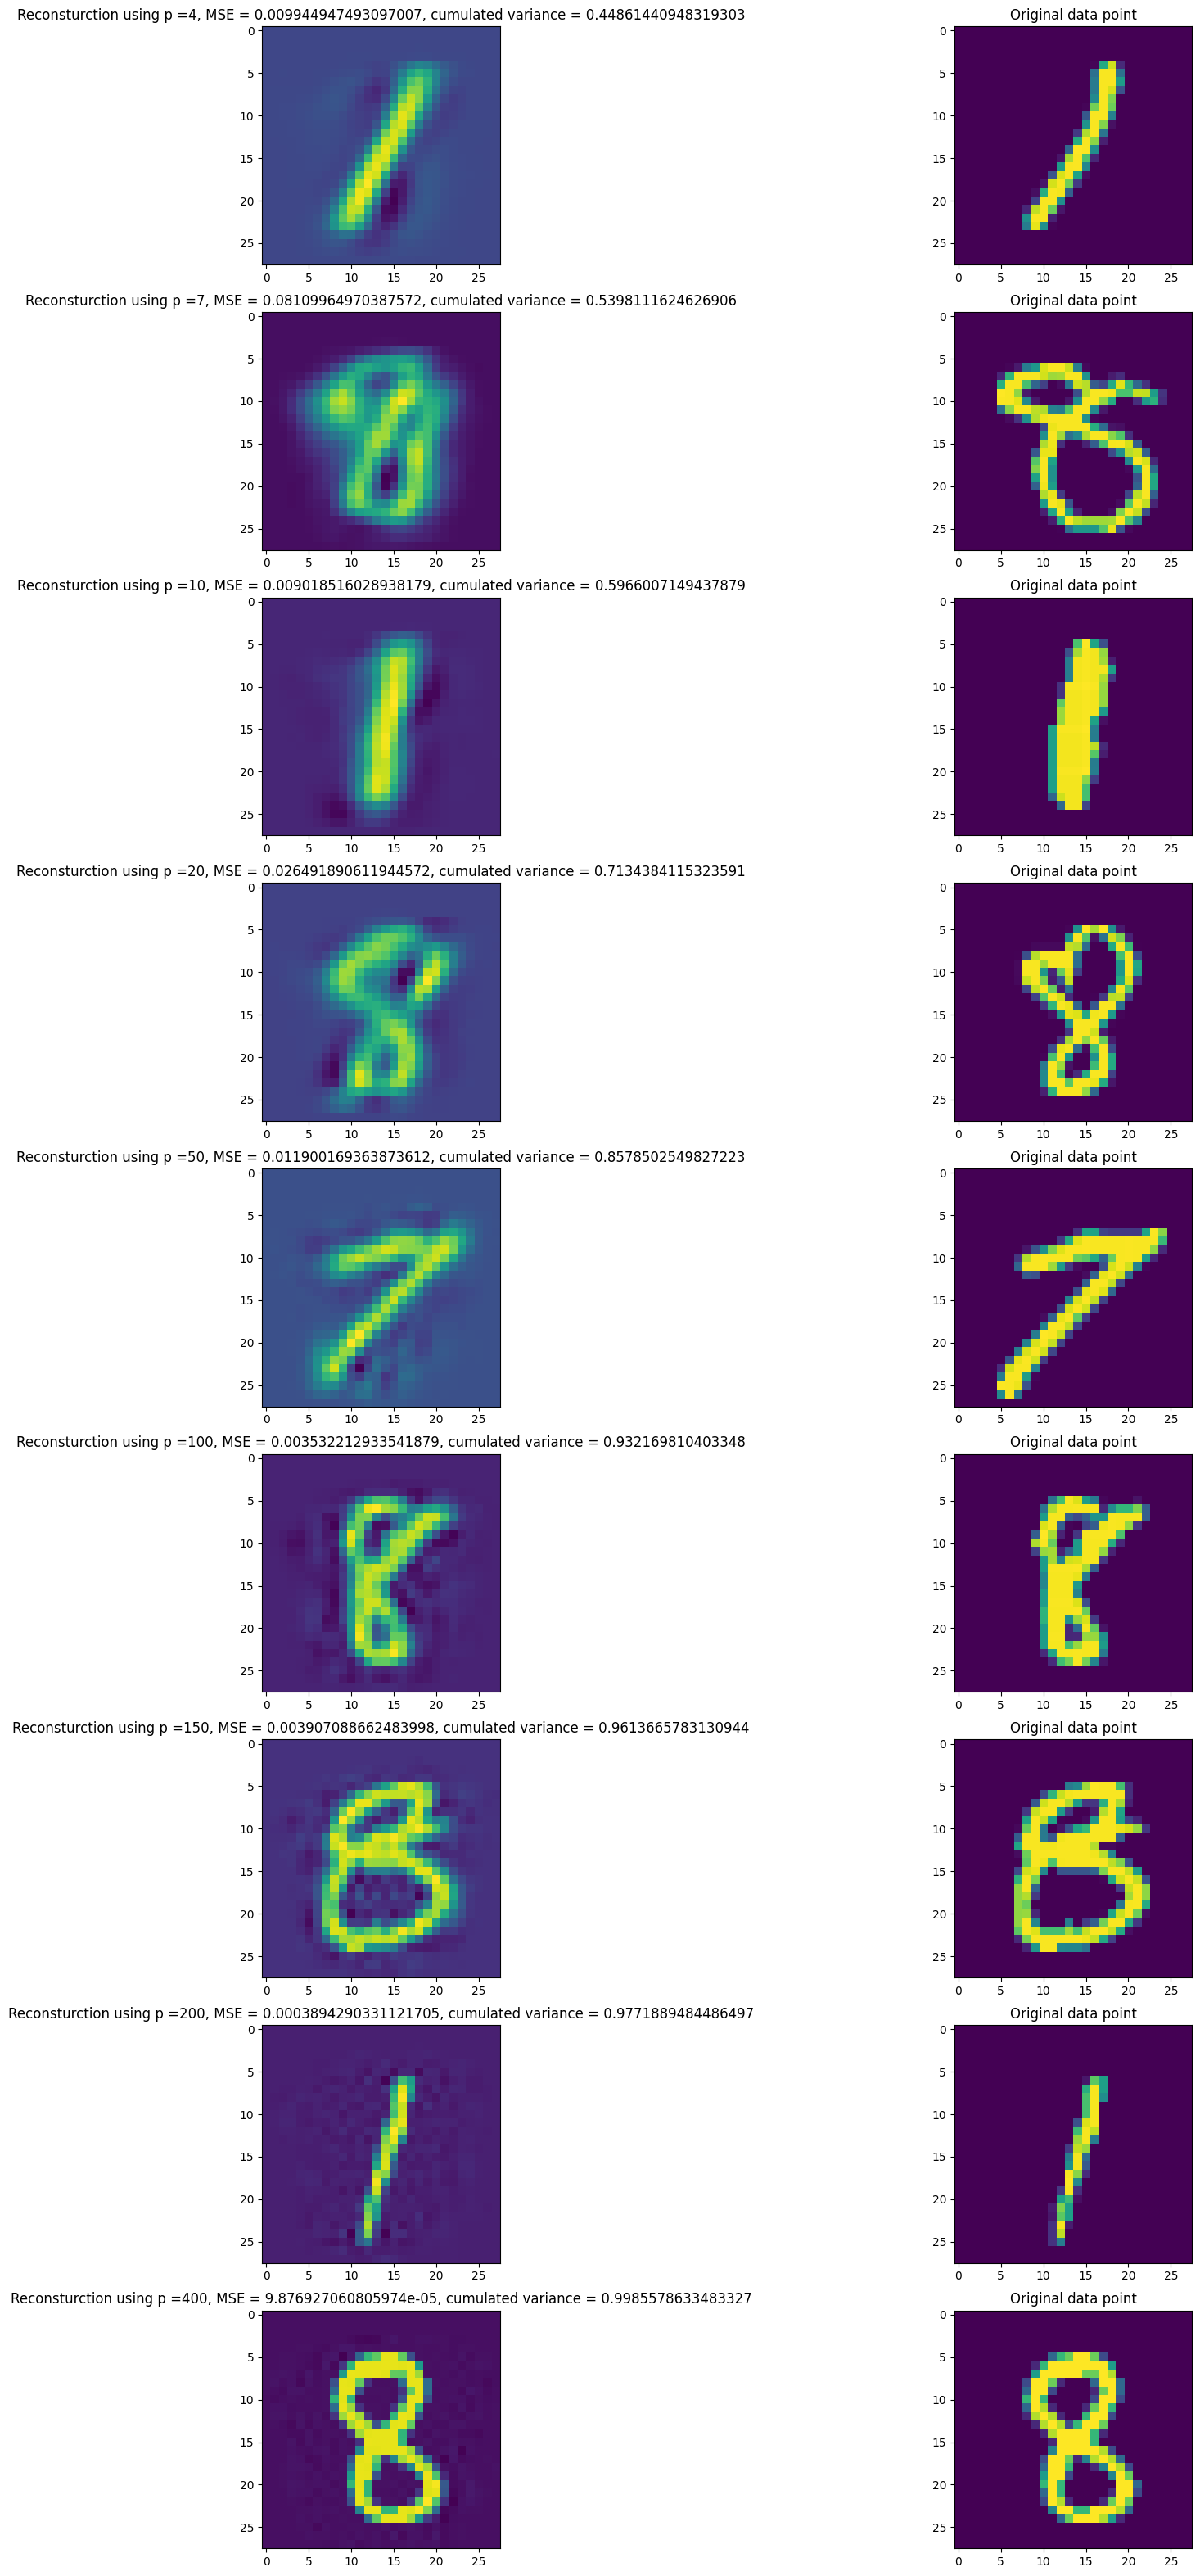

In [61]:
fig,axes = pl.subplots(len(D),2,figsize=(20,40))
for i in range(len(D)):
        error = ((lst_origin[i]-lst_reconstructions[i])**2).sum()
        error/=28*28
        axes[i][0].imshow(lst_reconstructions[i].reshape(28,28))
        axes[i][1].imshow(lst_origin[i].reshape(28,28))
        axes[i][0].set_title("Reconsturction using p ="+str(D[i])+", MSE = " + str(error)+ ", cumulated variance = "+ str(lst_variance[i]))
        axes[i][1].set_title("Original data point")

**Comments :**
- We can see that as we increase the value of p we keep getting better reconstruction results which makes sense since we tend to carry more information when we use more principale components.
- We can also notice that the good reconstruction starts when we use more then 100 principale components which corresponds to using more then 93% of the information of the data set.